In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from importlib import reload
import utils
import consts
from statannotations.Annotator import Annotator
reload(utils)
reload(consts)
PATH = os.getcwd()
# Load data
results_df = pd.read_parquet(os.path.join(PATH, 'data', 'combined_rna_seq', 'combined_results', 'combined_results_hindex.parquet.gzip'))
display(results_df.info())
with open(os.path.join(PATH, 'data', 'genes', 'Lombardi_hyp_genes.txt')) as f:
    lombardi_gene_list = f.read().splitlines()
%matplotlib inline
# Replace PC with PC3 in all 'cell_line' columns
# Set the oxygen concentration of PC3_hypx_0 and PC3_hypx_1 to 0.5 and 1 respectively
results_df.loc[results_df['dataset'].str.contains('PC3_hypx_0'), 'Oxygen Concentration'] = 0.5
results_df.loc[results_df['dataset'].str.contains('PC3_hypx_1'), 'Oxygen Concentration'] = 1
results_df.loc[results_df['dataset'].str.contains('HPMEC'), 'Oxygen Concentration'] = 1

results_df = results_df.replace('PC', 'PC3')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609577 entries, 198300 to 162316
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gene                          609577 non-null  object 
 1   baseMean                      609577 non-null  float64
 2   log2FoldChange                609577 non-null  float64
 3   lfcSE                         609577 non-null  float64
 4   stat                          609577 non-null  float64
 5   pvalue                        609545 non-null  float64
 6   padj                          468743 non-null  float64
 7   dataset                       609577 non-null  object 
 8   cell_line                     609577 non-null  object 
 9   Complex                       5208 non-null    object 
 10  Description                   5208 non-null    object 
 11  Protein_type                  5208 non-null    object 
 12  Genome                        5208 non-

None

In [2]:
hif1a_hct = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_HCT-116_hif1a_ko.csv')).rename(columns = {'Unnamed: 0' : 'Name'})
hif1a_hct['dataset'] = 'HCT-116_HIF1A_KO'
hif1a_hct['KO'] = 'HIF1A'
hif1a_hct['cell_line'] = 'HCT-116'
hif1a_hct['Oxygen Concentration'] = 1
hif1a_hct = hif1a_hct.merge(consts.GENELIST_DF, on = 'Name', how = 'left')
utils.mitonuclear_coordination(hif1a_hct, nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')
utils.mitonuclear_coordination(results_df[results_df['dataset'] == 'HCT-116_hypx_0'], nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')
utils.mitonuclear_coordination(results_df[results_df['dataset'] == 'HCT-116_hypx_2'], nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')
utils.mitonuclear_coordination(results_df[results_df['dataset'] == 'HCT-116_local'], nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')
hif1a_hct = hif1a_hct.rename(columns = {'Name' : 'gene'})
hif1a_hct['Name'] = '1%_HIF1A_KO'
hct_0 = results_df[results_df['dataset'] == 'HCT-116_hypx_0']
hct_0['Name'] = '0.5%'
hct_0['KO'] = 'WT'
hct_0['sign'] = hct_0['padj'] < 0.05
hct_0['logpadj'] = -np.log10(hct_0['padj'])
hct_1 = results_df[results_df['dataset'] == 'HCT-116_hypx_2']
hct_1['Name'] = '1%'
hct_1['KO'] = 'WT'
hct_1['sign'] = hct_1['padj'] < 0.05
hct_1['logpadj'] = -np.log10(hct_1['padj'])
hct_local = results_df[results_df['dataset'] == 'HCT-116_local']
hct_local['Name'] = '1% local'
hct_local['KO'] = 'WT'
hct_local['sign'] = hct_local['padj'] < 0.05
hct_local['logpadj'] = -np.log10(hct_local['padj'])

all_hct = pd.concat([hif1a_hct, hct_0, hct_1, hct_local], axis = 0)
all_hct.to_csv(os.path.join(PATH, 'data', 'all_hct_and_ko.csv'), index = False)


Not enough OXPHOS genes in HCT-116_HIF1A_KO (MT: 8, NUC: 11). Skipping...
Out of 1 datasets, 1 datasets were skipped due to insufficient genes.
0 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.06 +- 0.00
Out of 1 datasets, 0 datasets were skipped due to insufficient genes.
1 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.19 +- 0.00
Out of 1 datasets, 0 datasets were skipped due to insufficient genes.
1 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.05 +- 0.00
Out of 1 datasets, 0 datasets were skipped due to insufficient genes.
1 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.03 +- 0.00


C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1841275581.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hct_0['Name'] = '0.5%'
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1841275581.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hct_0['KO'] = 'WT'
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1841275581.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [3]:
reg_genes_df = pd.read_csv(os.path.join(PATH, 'data', 'genes', 'RNAstabilityAndTranscriptGenes_no_ap1.tsv'),sep = '\t')
reg_genes = reg_genes_df.Name.unique()


In [4]:
# Load the targetp results on all HS proteome and add gene symbols
targetp_results = pd.read_csv(os.path.join(PATH, 'data', 'targetp_humans', 'homo_summary.targetp2.tsv'), sep = '\t', skiprows=1, usecols = [0,1,2,3,4])
uniprot_to_symbol = pd.read_excel(os.path.join(PATH, 'data', 'targetp_humans', 'proteins_to_gene_symbols', 'idmap.xlsx'))
targetp_results = targetp_results.merge(uniprot_to_symbol, right_on = 'query', left_on = '# ID').dropna()
mt_targeted = targetp_results[targetp_results['Prediction'] == 'MT'].symbol.unique()

# Load the mitocarta gene list
mitocarta = pd.read_csv(os.path.join(PATH, 'data', 'mitocarta', 'mitogenes.csv'))
mitocarta_genes = mitocarta['Symbol'].unique()

In [5]:
coord_datasets = results_df[results_df['oxphos_coordination'] == 'Coordinated'].dataset.unique()
non_coord_datasets = results_df[results_df['oxphos_coordination'] == 'Non-coordinated'].dataset.unique()

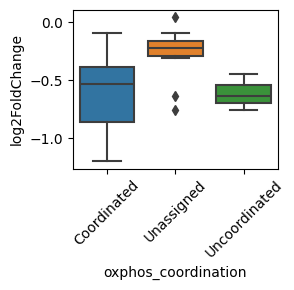

In [6]:
_, ax = plt.subplots(1, 1, figsize = (3, 3))
sns.boxplot(data = results_df[(results_df['gene'] == 'MTERF3')], x = 'oxphos_coordination', y = 'log2FoldChange', ax = ax)
# Flip xticklabels 45
plt.xticks(rotation = 45)
plt.tight_layout()

In [7]:
results_df_mat = results_df[(results_df['padj'] < 0.05) & (results_df['oxphos_coordination'] != 'Unassigned')].pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
hif1a_df_mat = all_hct.pivot_table(index = 'gene', columns = 'Name', values = 'log2FoldChange')
results_df_mat_all = results_df.pivot_table(index = 'gene', columns = 'dataset', values = 'log2FoldChange')
results_df_mat = results_df_mat.dropna(axis = 1, how = 'all').fillna(0)
hif1a_df_mat = hif1a_df_mat.dropna(axis = 1, how = 'all').fillna(0)
# Select oxphos genes 
oxphos_results = results_df_mat.loc[[i for i in results_df[results_df['Function'] == 'OXPHOS'].gene.unique() if i in results_df_mat.index],:]
# Sort oxphos_results by median LFC
oxphos_results = oxphos_results.loc[oxphos_results.median(axis = 1).sort_values(ascending = False).index,:]
# Drop genes with 0 LFC in majority of samples
# Reg gene results
reg_genes_mat = results_df_mat.loc[[i.upper() for i in reg_genes if i in results_df_mat.index],:]
reg_genes_hif1a_mat = hif1a_df_mat.loc[[i.upper() for i in reg_genes if i in hif1a_df_mat.index],:]
# Sort reg_genes_mat by median LFC
reg_genes_mat = reg_genes_mat.loc[reg_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
reg_genes_hif1a_mat = reg_genes_hif1a_mat.loc[reg_genes_hif1a_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Drop genes with 0 LFC in majority of samples
reg_genes_mat = reg_genes_mat.loc[((reg_genes_mat != 0).mean(axis = 1)) > 0.5, :]
reg_genes_hif1a_mat = reg_genes_hif1a_mat.loc[((reg_genes_hif1a_mat != 0).mean(axis = 1)) > 0.5, :]
oxphos_results = oxphos_results.loc[((oxphos_results != 0).mean(axis = 1)) > 0.5, :]




In [8]:
reload(utils)
# Load TCA Genes
tca_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'TCA_Go.txt'), mode = 'tsv').rename(columns = {'OGDHL' : 'gene'})
# Drop duplicate genes
tca_genes = tca_genes.drop_duplicates()
# Drop gene value 'gene'
tca_genes = tca_genes[tca_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
tca_genes = [i.upper() for i in tca_genes]

# Load glycolysis genes
glycolysis_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'glycolytic processGO_0006096.txt'))
# Drop duplicate genes
glycolysis_genes = glycolysis_genes.drop_duplicates()
# Drop gene value 'gene'
glycolysis_genes = glycolysis_genes[glycolysis_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
glycolysis_genes = [i.upper() for i in glycolysis_genes]

# Load ROS genes
ros_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'ROS_production.tsv'))
# Drop duplicate genes
ros_genes = ros_genes.drop_duplicates().Name.unique().tolist()
# Upper list
ros_genes = [i.upper() for i in ros_genes]

# Lactate dehydrogenase genes
ldh_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'L-lactate dehydrogenase activityGO_0004459.txt'))
# Drop duplicate genes
ldh_genes = ldh_genes.drop_duplicates()
# Drop gene value 'gene'
ldh_genes = ldh_genes[ldh_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
ldh_genes = [i.upper() for i in ldh_genes]
# Load RNA Binding protein genes
rbp_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'RNA_BINDING_PROTEINS_GO.txt'))
# Drop duplicate genes
rbp_genes = rbp_genes.drop_duplicates()
# Drop gene value 'gene'
rbp_genes = rbp_genes[rbp_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
rbp_genes = [i.upper() for i in rbp_genes]

# Load TF genes
tf_genes = utils.genelist(os.path.join(PATH, 'data', 'genes', 'TF_names_v_1.01.txt'))
# Drop duplicate genes
tf_genes = tf_genes.drop_duplicates()
# Drop gene value 'gene'
tf_genes = tf_genes[tf_genes['gene'] != 'gene'].gene.unique().tolist()
# Upper list
tf_genes = [i.upper() for i in tf_genes]

# TF differentialy bound in hypoxia by HIF1
hif1 = utils.genelist(os.path.join(PATH, 'data', 'genes', 'diffbind_by_hif1_hypx.txt'))
hif1 = hif1.drop_duplicates()
hif1 = hif1[hif1['gene'] != 'gene'].gene.unique().tolist()
# Create an intersection between tf_genes and reg_genes
mt_tf = [i for i in tf_genes if i in reg_genes]

# Create glyc genes mat
gly_genes_mat = results_df_mat.loc[[i for i in glycolysis_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
gly_genes_mat = gly_genes_mat.loc[((gly_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.isna().mean(axis = 1) < 0.5, :]
gly_genes_mat = gly_genes_mat.loc[gly_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create ros genes mat
ros_genes_mat = results_df_mat.loc[[i for i in ros_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
ros_genes_mat = ros_genes_mat.loc[((ros_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.isna().mean(axis = 1) < 0.5, :]
ros_genes_mat = ros_genes_mat.loc[ros_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create TCA genes mat
tca_genes_mat = results_df_mat.loc[[i for i in tca_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
tca_genes_mat = tca_genes_mat.loc[((tca_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
tca_genes_mat = tca_genes_mat.loc[tca_genes_mat.isna().mean(axis = 1) < 0.5, :]
tca_genes_mat = tca_genes_mat.loc[tca_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create RNA binding proteins mat
rbp_mat = results_df_mat.loc[[i for i in rbp_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
rbp_mat = rbp_mat.loc[((rbp_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
rbp_mat = rbp_mat.loc[rbp_mat.isna().mean(axis = 1) < 0.5, :]
rbp_mat = rbp_mat.loc[rbp_mat.median(axis = 1).sort_values(ascending = False).index,:]

# Create TF genes mat
tf_genes_mat = results_df_mat.loc[[i for i in tf_genes if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
tf_genes_mat = tf_genes_mat.loc[((tf_genes_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
tf_genes_mat = tf_genes_mat.loc[tf_genes_mat.isna().mean(axis = 1) < 0.5, :]
tf_genes_mat = tf_genes_mat.loc[tf_genes_mat.median(axis = 1).sort_values(ascending = False).index,:]
# Create HIF1 TF genes mat
hif1_mat = results_df_mat.loc[[i for i in hif1 if i in results_df_mat.index],:]
# Remove genes with 0 LFC in majority of samples
hif1_mat = hif1_mat.loc[((hif1_mat != 0).mean(axis = 1)) > 0.5, :]
# Remove genes with NA in majority of samples
hif1_mat = hif1_mat.loc[hif1_mat.isna().mean(axis = 1) < 0.5, :]
hif1_mat = hif1_mat.loc[hif1_mat.median(axis = 1).sort_values(ascending = False).index,:]

tf_rbp_mat = pd.concat([tf_genes_mat, rbp_mat], axis = 0)

print(f'Regulatory gene list: Out of {len(reg_genes_df.Name.unique())} genes, only {round((len(reg_genes_mat)/len(reg_genes_df.Name.unique()))*100)}% (N = {len(reg_genes_mat)}) are are significantly altered in over 50% of datasets')
print(f'Glycolysis gene list: Out of {len(glycolysis_genes)} genes, only {round((len(gly_genes_mat)/len(glycolysis_genes))*100)}% (N = {len(gly_genes_mat)}) are are significantly altered in over 50% of datasets')
print(f'ROS gene list: Out of {len(ros_genes)} genes, only {round((len(ros_genes_mat)/len(ros_genes))*100)}% (N = {len(ros_genes_mat)}) are are significantly altered in over 50% of datasets')
print(f'TCA gene list: Out of {len(tca_genes)} genes, only {round((len(tca_genes_mat)/len(tca_genes))*100)}% (N = {len(tca_genes_mat)}) are are significantly altered in over 50% of datasets')
print(f'TF gene list: Out of {len(tf_genes)} genes, only {round((len(tf_genes_mat)/len(tf_genes))*100)}% (N = {len(tf_genes_mat)}) are are significantly altered in over 50% of datasets')
print(f'RNA binding protein gene list: Out of {len(rbp_genes)} genes, only {round((len(rbp_mat)/len(rbp_genes))*100)}% (N = {len(rbp_mat)}) are are significantly altered in over 50% of datasets')
print(f'TF and RBP gene list: Out of {len(rbp_genes + tf_genes)} genes, only {round((len(tf_rbp_mat)/len(rbp_genes + tf_genes))*100)}% (N = {len(tf_rbp_mat)}) are are significantly altered in over 50% of datasets \nOut of these, {len(tf_rbp_mat.loc[[i for i in tf_rbp_mat.index if i in hif1], :].index.unique())} are targeted by HIF1')

print(f'HIF1 TF gene list: Out of {len(tf_genes_mat)} altered TF genes, only {round((len(tf_genes_mat.loc[[i for i in tf_genes_mat.index if i in hif1], :].index.unique())/len(tf_genes_mat))*100)}% (N = {len(tf_genes_mat.loc[[i for i in tf_genes_mat.index if i in hif1], :].index.unique())}) contain TSS-proximal HIF1 binding sites')


Regulatory gene list: Out of 128 genes, only 47% (N = 60) are are significantly altered in over 50% of datasets
Glycolysis gene list: Out of 114 genes, only 46% (N = 53) are are significantly altered in over 50% of datasets
ROS gene list: Out of 198 genes, only 35% (N = 70) are are significantly altered in over 50% of datasets
TCA gene list: Out of 34 genes, only 38% (N = 13) are are significantly altered in over 50% of datasets
TF gene list: Out of 1640 genes, only 14% (N = 225) are are significantly altered in over 50% of datasets
RNA binding protein gene list: Out of 1678 genes, only 40% (N = 676) are are significantly altered in over 50% of datasets
TF and RBP gene list: Out of 3318 genes, only 27% (N = 901) are are significantly altered in over 50% of datasets 
Out of these, 75 are targeted by HIF1
HIF1 TF gene list: Out of 225 altered TF genes, only 13% (N = 29) contain TSS-proximal HIF1 binding sites


In [9]:
results_df_mito = results_df[results_df['Complex'].notna()]
results_df_mito = results_df_mito[results_df_mito['oxphos_coordination'] != 'x']
results_df_mito = results_df_mito[results_df_mito['padj'] < .05]
results_df_mito = results_df_mito.sort_values(by = ['oxphos_coordination', 'log2FoldChange'], ascending = True)
top_datasets = results_df_mito.groupby('cell_line').agg({'dataset' : 'first'}).dataset.tolist()
top_datasets = [i for i in top_datasets if i not in ['BCC_mix_hypx']]


Mean up: 4.31+-3.7, mean down: 11.88+-6.0
Mean up: 19.25+-2.21, mean down: 4.88+-2.6
Mean up: 47.56+-9.46, mean down: 34.94+-14.13
Mean up: 8.81+-3.62, mean down: 19.56+-8.74
Mean up: 10.12+-2.85, mean down: 24.0+-9.07
Mean up: 42.96+-5.5, mean down: 0.36+-1.11


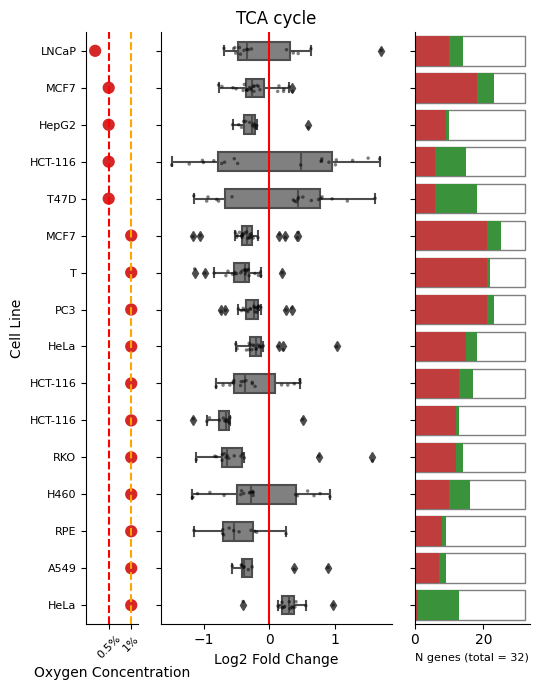

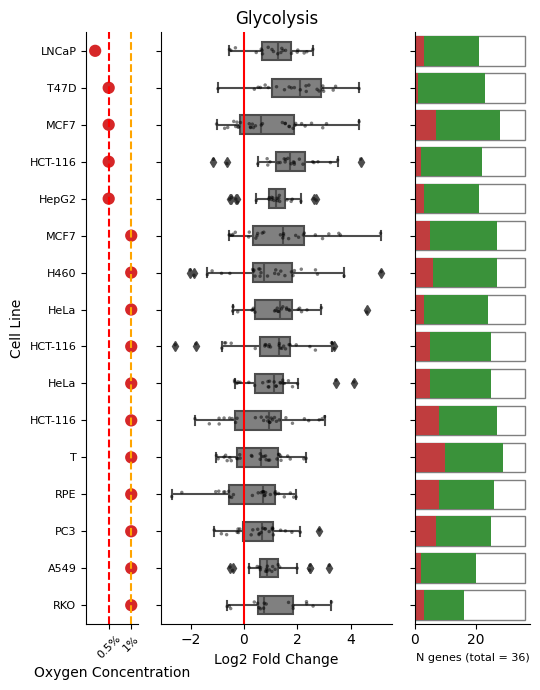

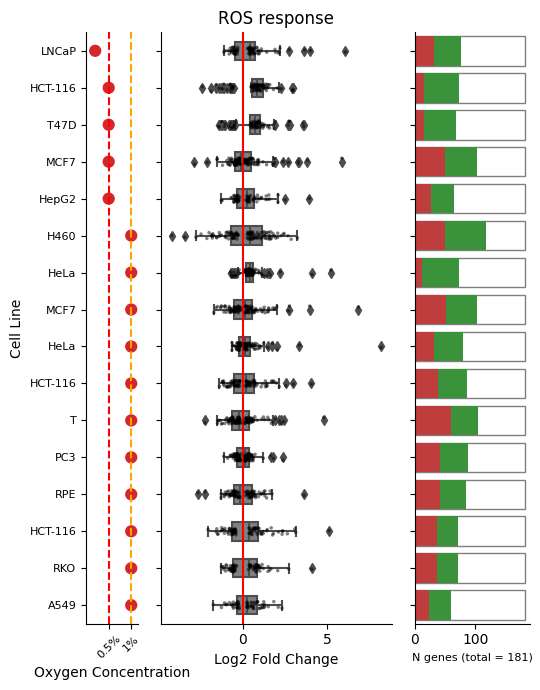

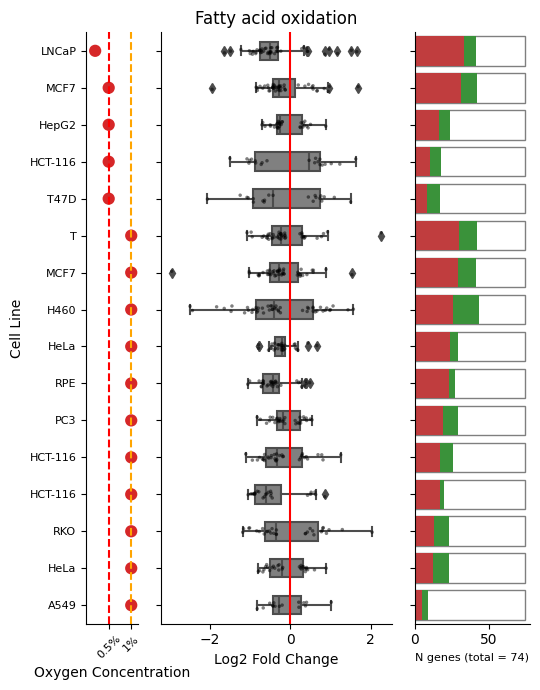

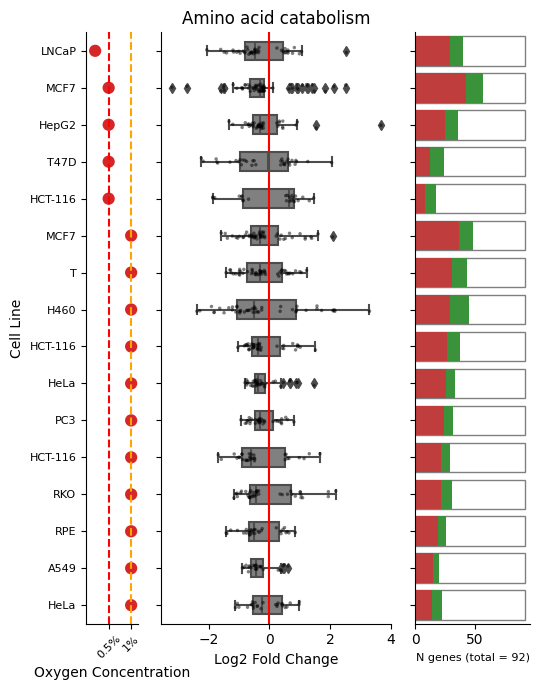

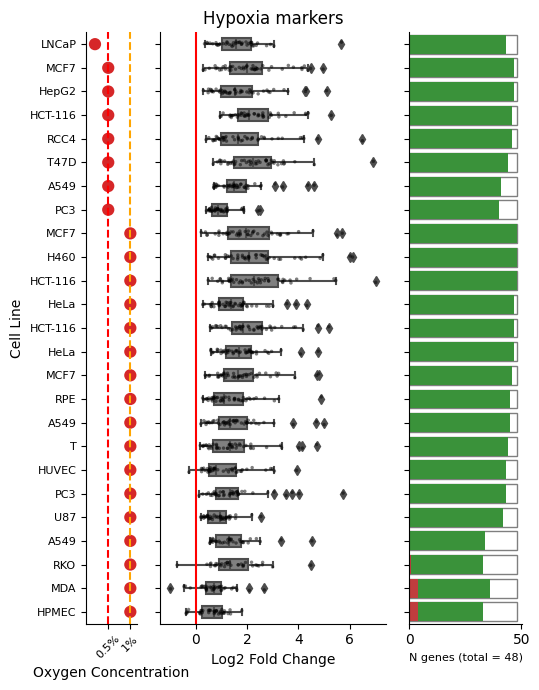

In [10]:
reload(utils)
threshold = .1
results_df_sign = results_df[results_df['padj'] < threshold]
lombardi_df, lombardi_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'Lombardi_hyp_genes.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
results_df_sign = results_df_sign[results_df_sign['oxphos_coordination'] != 'Unassigned']
tca_genes_df, tca_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'TCA_Go.txt'), mode = 'tsv', gene_col = 'OGDHL', return_format='long', threshold = threshold)
fatt_genes_df, fatt_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'FATTY_ACID_OXIDATION_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
gly_genes_df, gly_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'CANONICAL_GLYCOLYSIS_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)
ros_genes_df, ros_dataset_df = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'ROS_production.tsv'), mode = 'tsv', gene_col = 'Name', return_format='long', threshold = threshold)
aa_catabolism_genes_df, aa_catabolism_dataset_df  = utils.create_gene_set_matrix(results_df_sign, os.path.join(PATH, 'data', 'genes', 'CATABOLISM_OF_AMINO_ACIDS_GO.txt'), mode = 'txt', gene_col = 'gene', return_format='long', threshold = threshold)

#tca_genes_df = tca_genes_df[tca_genes_df.dataset.isin(top_datasets)]
#tca_dataset_df = tca_dataset_df[tca_dataset_df.dataset.isin(top_datasets)]
#gly_genes_df = gly_genes_df[gly_genes_df.dataset.isin(top_datasets)]
#gly_dataset_df = gly_dataset_df[gly_dataset_df.dataset.isin(top_datasets)]
#ros_genes_df = ros_genes_df[ros_genes_df.dataset.isin(top_datasets)]
#os_dataset_df = ros_dataset_df[ros_dataset_df.dataset.isin(top_datasets)]
#fatt_genes_df = fatt_genes_df[fatt_genes_df.dataset.isin(top_datasets)]
#fatt_dataset_df = fatt_dataset_df[fatt_dataset_df.dataset.isin(top_datasets)]
#aa_catabolism_genes_df = aa_catabolism_genes_df[aa_catabolism_genes_df.dataset.isin(top_datasets)]
#aa_catabolism_dataset_df = aa_catabolism_dataset_df[aa_catabolism_dataset_df.dataset.isin(top_datasets)]

# Combine all datasets df into a summary df
tca_dataset_df['gene_set'] = 'TCA cycle genes'
gly_dataset_df['gene_set'] = 'Glycolysis genes'
ros_dataset_df['gene_set'] = 'ROS response genes'
fatt_dataset_df['gene_set'] = 'Fatty acid oxidation genes'
aa_catabolism_dataset_df['gene_set'] = 'Amino acid catabolism genes'
lombardi_dataset_df['gene_set'] = 'Lombardi hypoxia genes'
dataset_df = pd.concat([tca_dataset_df, gly_dataset_df, ros_dataset_df, fatt_dataset_df, aa_catabolism_dataset_df], axis = 0)
# Plot 
xlab = 'Log2 Fold Change'
hue = ''
x = 'log2FoldChange'
sort_by = 'log2FoldChange'
palette = 'tab10'
corr_col = 'oxphos_coordination_value'
ascending = False
legend = False
correlate = False
utils.plot_gene_set_per_dataset(tca_genes_df, tca_dataset_df, savefig = 'tca_per_dataset', title = 'TCA cycle', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', extra_x_cat = 'Oxygen Concentration')
utils.plot_gene_set_per_dataset(gly_genes_df, gly_dataset_df, savefig = 'glycolysis_per_dataset', title = 'Glycolysis', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', extra_x_cat = 'Oxygen Concentration')
utils.plot_gene_set_per_dataset(ros_genes_df, ros_dataset_df, savefig = 'ros_per_dataset', title = 'ROS response', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', extra_x_cat = 'Oxygen Concentration')
utils.plot_gene_set_per_dataset(fatt_genes_df, fatt_dataset_df, savefig = 'fatty_acid_oxidation_per_dataset', title = 'Fatty acid oxidation', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', extra_x_cat = 'Oxygen Concentration')
utils.plot_gene_set_per_dataset(aa_catabolism_genes_df, aa_catabolism_dataset_df, savefig = 'aa_catabolism_per_dataset', title = 'Amino acid catabolism', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', extra_x_cat = 'Oxygen Concentration')
utils.plot_gene_set_per_dataset(lombardi_df, lombardi_dataset_df, savefig = 'lombardi_per_dataset', title = 'Hypoxia markers', palette = palette, linewidth = 1.5, alpha = .5, hue = hue, sort_by = sort_by, ascending = ascending, correlate = correlate, xlab = xlab, legend = legend, x=x, corr_col = corr_col, y = 'dataset', extra_x_cat = 'Oxygen Concentration')

TCA cycle genes
R value = -0.24     p-value = 0.38
Glycolysis genes
R value = -0.2     p-value = 0.458
Fatty acid oxidation genes
R value = -0.28     p-value = 0.289
Amino acid catabolism genes
R value = -0.02     p-value = 0.931


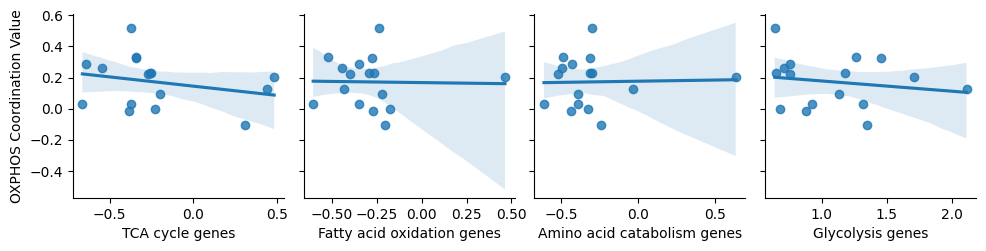

In [11]:
# Pivot by gene set
dataset_df_pivot = dataset_df.pivot_table(index = 'dataset', columns = 'gene_set', values = 'mean_lfc', aggfunc = 'median')
dataset_df_pivot['OXPHOS Coordination Value'] = dataset_df_pivot.index.map(tca_dataset_df.set_index('dataset').oxphos_coordination_value)

# Make a pairplot add correlation
g = sns.pairplot(dataset_df_pivot, x_vars = ['TCA cycle genes', 'Fatty acid oxidation genes', 'Amino acid catabolism genes', 'Glycolysis genes'], y_vars = ['OXPHOS Coordination Value'], height = 2.5, aspect = 1, kind = 'reg', diag_kind = None, palette = 'tab:green')
# Check the correlation values for all pairs and p-values
for i in ['TCA cycle genes', 'Glycolysis genes', 'Fatty acid oxidation genes', 'Amino acid catabolism genes']:
    print(i)
    cor = stats.spearmanr(dataset_df_pivot[i], dataset_df_pivot['OXPHOS Coordination Value'])
    print(f'R value = {round(cor[0], 2)}     p-value = {round(cor[1], 3)}')
# savefig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_coordination_vs_gene_sets.svg'), bbox_inches = 'tight')
# Add correlation values to the plot
corr_df = dataset_df_pivot.corr(method = 'spearman')
corr_df = corr_df.loc[['TCA cycle genes', 'Glycolysis genes', 'Fatty acid oxidation genes', 'Amino acid catabolism genes'], ['OXPHOS Coordination Value']]
corr_df = corr_df.reset_index()
corr_df.columns = ['gene_set', 'correlation']
corr_df['correlation'] = corr_df['correlation'].round(2)
corr_df['p-value'] = corr_df['gene_set'].map(lambda x: stats.spearmanr(dataset_df_pivot[x], dataset_df_pivot['OXPHOS Coordination Value'])[1])
corr_df['p-value'] = corr_df['p-value'].round(3)
corr_df['gene_set'] = corr_df['gene_set'].map(lambda x: x.replace(' genes', ''))
corr_df = corr_df.sort_values(by = 'correlation', ascending = False)
corr_df['correlation'] = corr_df['correlation'].map(lambda x: str(x))
corr_df['p-value'] = corr_df['p-value'].map(lambda x: str(x))
corr_df = corr_df.set_index('gene_set')
corr_df = corr_df.loc[['TCA cycle', 'Fatty acid oxidation', 'Amino acid catabolism', 'Glycolysis'],:]
corr_df = corr_df.reset_index()
corr_df.columns = ['Gene set', 'Correlation', 'p-value']
corr_df = corr_df.set_index('Gene set')


In [12]:
# Report the mean percentage of glycolysis genes that are up-regulated in hypoxia and the standard deviation of the percentage
print(f'There are {round((gly_dataset_df["up"].mean() / gly_dataset_df["up+down"].mean()) * 100)} +/- {round((gly_dataset_df["up"].std() / gly_dataset_df["up+down"].mean()) * 100)}% of glycolysis genes that are up-regulated in hypoxia')

There are 80 +/- 9% of glycolysis genes that are up-regulated in hypoxia


In [13]:
dataset_df_pivot_oxlfc = dataset_df.pivot_table(index = 'dataset', columns = 'gene_set', values = 'mean_lfc', aggfunc = 'median')
dataset_df_pivot_oxlfc['OXPHOS Log2 Fold-Change'] = dataset_df_pivot_oxlfc.index.map(tca_dataset_df.set_index('dataset').oxphos_lfc)



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

LDHB vs. LDHA: Mann-Whitney-Wilcoxon test two-sided, P_val:2.554e-06 U_stat=0.000e+00


C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\207864099.py:2: DeprecationWarning: 'cgi' is deprecated and slated for removal in Python 3.13
  from cgi import test


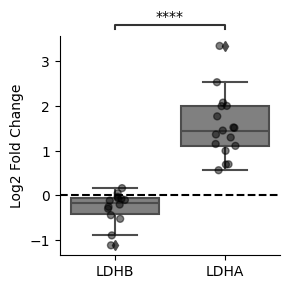

In [14]:
# Plot the distribution of LDHA and LDHB across all datasets
from cgi import test
from matplotlib import lines


ldhab = results_df[results_df['gene'].isin(['LDHA', 'LDHB'])]
# Filter for top datasets``
ldhab = ldhab[ldhab['dataset'].isin(top_datasets)]
_, ax = plt.subplots(figsize = (3, 3))
sns.boxplot(ax = ax, data = ldhab, x = 'gene', y = 'log2FoldChange', dodge = False, color = 'grey')
# Add a stripplot
sns.stripplot(ax = ax, data = ldhab, dodge = False, x = 'gene', y = 'log2FoldChange',  alpha = .5, color = 'black', linewidth = 1)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
# Mark significance
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Add stat annotation
annotator = Annotator(ax = ax, pairs = [('LDHA', 'LDHB')], data = ldhab, x = 'gene', y = 'log2FoldChange')
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside')
annotator.apply_and_annotate()
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'ldha_ldhb_distribution.svg'), bbox_inches = 'tight')

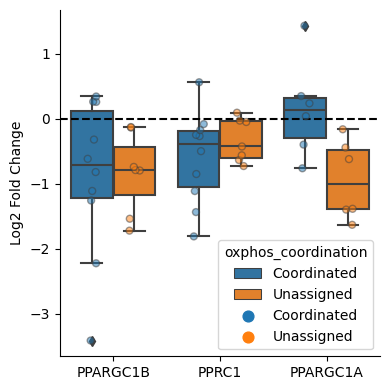

In [15]:
# Plot the distribution of LDHA and LDHB across all datasets
from cgi import test
from matplotlib import lines


pgc = results_df[results_df['gene'].isin(['PPARGC1A', 'PPARGC1B', 'PPRC1'])]
pgc = pgc[pgc.dataset.isin(top_datasets)]
# Add a sign column
pgc['sign'] = pgc['padj'] < 0.05
# Filter for top datasets
_, ax = plt.subplots(figsize = (4,4))
sns.boxplot(ax = ax, data = pgc, x = 'gene', y = 'log2FoldChange', dodge = True, hue = 'oxphos_coordination')
# Add a stripplot
sns.stripplot(ax = ax, data = pgc,  x = 'gene', y = 'log2FoldChange',  alpha = .5, hue = 'oxphos_coordination', dodge = True, linewidth = 1)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
# Mark significance
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()

# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'ppar_lfc_distribution.svg'), dpi = 300, bbox_inches = 'tight')

In [16]:
jun_oe_t = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_T_CD4_JUN_OE.csv')).rename(columns = {'Unnamed: 0' : 'Gene'})
jun_oe_t['dataset'] = 'res_T_CD4_JUN_OE'
jun_oe_t = jun_oe_t.merge(consts.GENELIST_DF, left_on = 'Gene', right_on = 'Name', how = 'left')

jun_oe_ew8 = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_EW8_JUN_FOS_OE.csv')).rename(columns = {'Unnamed: 0' : 'Gene'})
jun_oe_ew8['dataset'] = 'res_EW8_JUN_FOS_OE'
jun_oe_ew8 = jun_oe_ew8.merge(consts.GENELIST_DF, left_on = 'Gene', right_on = 'Name', how = 'left')
jun_oe_tc71 = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_TC71_JUN_FOS_OE.csv')).rename(columns = {'Unnamed: 0' : 'Gene'})
jun_oe_tc71['dataset'] = 'res_TC71_JUN_FOS_OE'
jun_oe_tc71 = jun_oe_tc71.merge(consts.GENELIST_DF, left_on = 'Gene', right_on = 'Name', how = 'left')


t_df = results_df[results_df['dataset'] == 'T_hypx_1']


In [17]:
print(f'JUN LFC of CD4 JUN O.E: {round(jun_oe_t[jun_oe_t["Gene"] == "JUN"].log2FoldChange.mean(),3)}')
print(f'JUN LFC of T hypoxia: {round(t_df[t_df["gene"] == "JUN"].log2FoldChange.mean(),3)}')
print(f'JUN LFC of EW8 JUN FOS O.E: {round(jun_oe_ew8[jun_oe_ew8["Gene"] == "JUN"].log2FoldChange.mean(),3)}')
print(f'JUN LFC of TC71 JUN FOS O.E: {round(jun_oe_tc71[jun_oe_tc71["Gene"] == "JUN"].log2FoldChange.mean(),3)}')

JUN LFC of CD4 JUN O.E: 1.424
JUN LFC of T hypoxia: 1.231
JUN LFC of EW8 JUN FOS O.E: 4.494
JUN LFC of TC71 JUN FOS O.E: 5.17


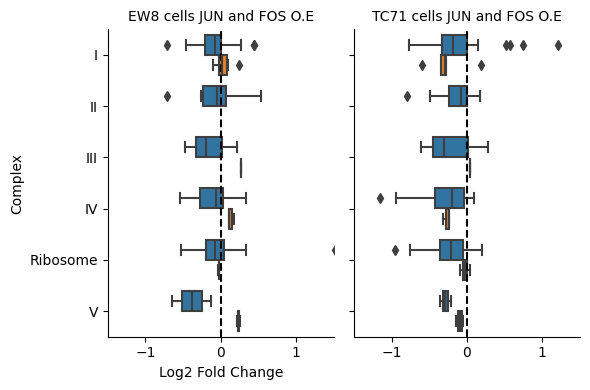

In [18]:
_, ax = plt.subplots(1, 2, figsize = (6, 4), sharex=True, sharey=True)
sns.boxplot(data = jun_oe_ew8[jun_oe_ew8['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[0], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = jun_oe_tc71[jun_oe_tc71['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])

sns.despine()
plt.tight_layout()
# Add line for 0
ax[0].axvline(x = 0, color = 'black', linestyle = '--')
ax[0].set_title('EW8 cells JUN and FOS O.E', fontsize = 10)
ax[1].axvline(x = 0, color = 'black', linestyle = '--')
ax[1].set_title('TC71 cells JUN and FOS O.E', fontsize = 10)

#xlim = 1.5
ax[0].set_xlim(-1.5, 1.5)
ax[1].set_xlim(-1.5, 1.5)
# Remove x title
for i in ax:
    i.set_xlabel('')
    i.set_ylabel('')
    if i == ax[0]:
        i.set_ylabel('Complex')
        i.set_xlabel('Log2 Fold Change')
# Remove all legends
for i in ax:
    i.get_legend().remove()
plt.tight_layout()


C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1842437468.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = t_df[results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])


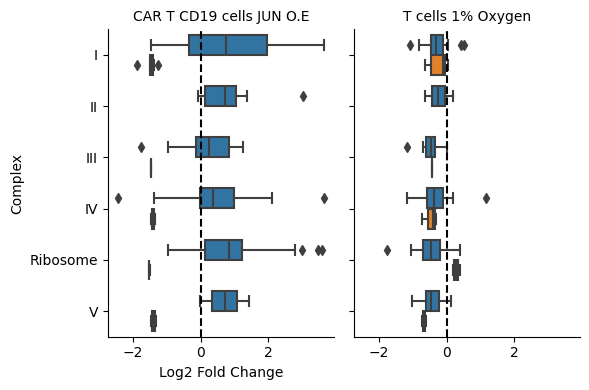

In [19]:
_, ax = plt.subplots(1, 2, figsize = (6, 4), sharex=True, sharey=True)
sns.boxplot(data = jun_oe_t[jun_oe_t['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[0], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = t_df[results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])

sns.despine()
plt.tight_layout()
# Add line for 0
ax[0].axvline(x = 0, color = 'black', linestyle = '--')
ax[0].set_title('CAR T CD19 cells JUN O.E', fontsize = 10)
ax[1].axvline(x = 0, color = 'black', linestyle = '--')
ax[1].set_title('T cells 1% Oxygen', fontsize = 10)

# Remove x title
for i in ax:
    i.set_xlabel('')
    i.set_ylabel('')
    if i == ax[0]:
        i.set_ylabel('Complex')
        i.set_xlabel('Log2 Fold Change')
# Remove all legends
for i in ax:
    i.get_legend().remove()
plt.tight_layout()


In [20]:
jun_oe_t['Name'] = 'JUN OE'
t_df['Name'] = 'T hypx'
jun_oe_t = jun_oe_t.rename(columns = {'Gene' : 'gene'})
all_t = pd.concat([jun_oe_t, t_df], axis = 0)

C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\435453122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['Name'] = 'T hypx'


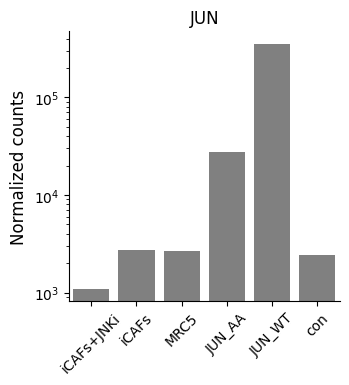

In [21]:
import statannot
counts_oe = pd.read_csv(os.path.join(PATH, 'data', 'norm', 'norm_Fibroblast_JUN_OE.csv')).rename(columns = {'Unnamed: 0' : 'gene'})
metadata_oe = pd.read_csv(os.path.join(PATH, 'data', 'metadata', 'Fibroblast_JUN_OE.csv'))
# Convert counts to long format
counts_oe_long = counts_oe.melt(id_vars = 'gene', var_name = 'Sample', value_name = 'Counts')
# Merge with metadata
counts_oe_long = counts_oe_long.merge(metadata_oe, left_on = 'Sample', right_on = 'sample_accession')
gene = 'JUN'
# Combine with consts.GENELIST_DF
counts_oe_long = counts_oe_long.merge(consts.GENELIST_DF, left_on = 'gene', right_on = 'Name', how = 'left')

_, ax = plt.subplots(figsize = (3.5, 3.5))
sns.barplot(x = 'treatment', y = 'Counts', data = counts_oe_long[counts_oe_long.gene == gene], ax = ax, color = 'grey')
conditions = counts_oe_long[counts_oe_long.gene == gene]['treatment'].unique()
# Log scale
ax.set_yscale('log')
# Rotate x labels 45
plt.xticks(rotation = 45)
pairs = [(conditions[i], conditions[j]) for i in range(len(conditions)) for j in range(i+1, len(conditions))]
#statannot.add_stat_annotation(ax, data = counts_oe_long[counts_oe_long.gene == gene], x = 'treatment', y = 'Counts', box_pairs = pairs, test = 'Mann-Whitney', text_format = 'star', loc = 'inside', fontsize = 'large', verbose = 2, comparisons_correction = None)
ax.set_title(gene)
ax.set_ylabel('Normalized counts', fontsize = 12)
ax.set_xlabel('')
sns.despine()
ax.grid(False)

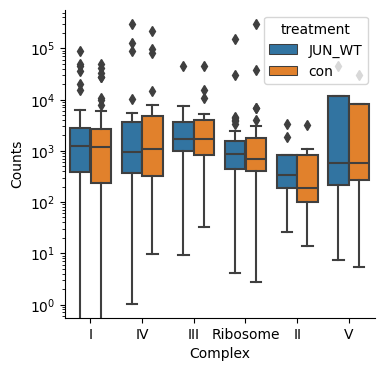

In [22]:
# Compare OXPHOS and mitoribosome genes in each genome between JUN_WT and con treatment values
_, ax = plt.subplots(figsize = (4, 4))
sns.boxplot(data = counts_oe_long[(counts_oe_long['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])) & (counts_oe_long['treatment'].isin(['con', 'JUN_WT']))], x = 'Complex', y = 'Counts', hue = 'treatment', ax = ax)
# Turn to log scale
plt.yscale('log')
# Despine
sns.despine()

In [23]:
oxphos_and_mitoribosome_genes = results_df[(results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])) & (results_df['Genome'] != 'MT')].gene.unique()

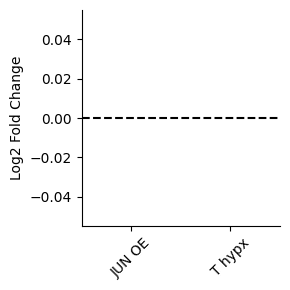

In [24]:
geneset = oxphos_and_mitoribosome_genes
_,ax = plt.subplots(1, 1, figsize = (3, 3))
pairs = [('1%_HIF1A_KO', '0.5%'), ('1%_HIF1A_KO', '1%'), ('1%', '0.5%')]
order = ['JUN OE', 'T hypx']
sns.boxplot(data = all_t[all_t['gene'].isin([geneset])], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'lightgrey', order = order)
sns.stripplot(data = all_t[all_t['gene'].isin([geneset])], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'black', alpha = .5, order = order)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()

# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'oxphos_and_mitoribosome_genes_t_and_jun_oe.svg'), dpi = 300, bbox_inches = 'tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\2122322698.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = results_df[results_df['dataset'] == 'HCT-116_hypx_0'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\2122322698.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = results_df[results_df['dataset'] == 'HCT-116_hypx_2'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[2], hue = 'Genome', hue_order = ['NUC', 'MT'])
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\2122322698.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = results_df[results_df['dat

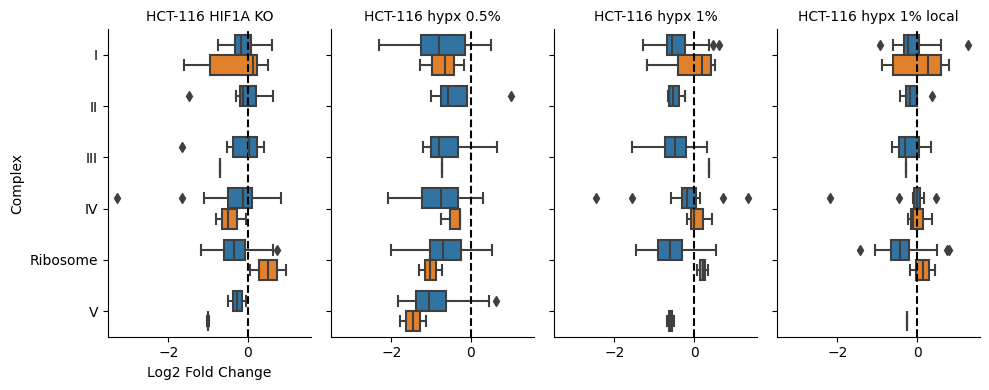

In [25]:
_, ax = plt.subplots(1, 4, figsize = (10, 4), sharex=True, sharey=True)
sns.boxplot(data = hif1a_hct[hif1a_hct['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[0], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = results_df[results_df['dataset'] == 'HCT-116_hypx_0'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = results_df[results_df['dataset'] == 'HCT-116_hypx_2'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[2], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = results_df[results_df['dataset'] == 'HCT-116_local'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[3], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.despine()
plt.tight_layout()
# Add line for 0
ax[0].axvline(x = 0, color = 'black', linestyle = '--')
ax[0].set_title('HCT-116 HIF1A KO', fontsize = 10)
ax[1].axvline(x = 0, color = 'black', linestyle = '--')
ax[1].set_title('HCT-116 hypx 0.5%', fontsize = 10)
ax[2].axvline(x = 0, color = 'black', linestyle = '--')
ax[2].set_title('HCT-116 hypx 1%', fontsize = 10)
ax[3].axvline(x = 0, color = 'black', linestyle = '--')
ax[3].set_title('HCT-116 hypx 1% local', fontsize = 10)
# Remove x title
for i in ax:
    i.set_xlabel('')
    i.set_ylabel('')
    if i == ax[0]:
        i.set_ylabel('Complex')
        i.set_xlabel('Log2 Fold Change')
# Remove all legends
for i in ax:
    i.get_legend().remove()
plt.tight_layout()


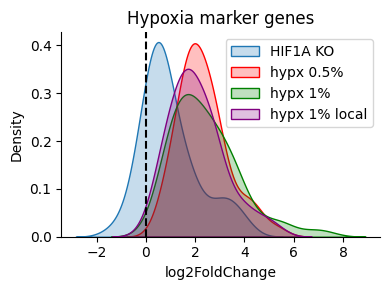

In [26]:
_, ax = plt.subplots( figsize = (4, 3))

sns.kdeplot(data = hif1a_hct[hif1a_hct['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'HIF1A KO', alpha = .25)
sns.kdeplot(data = hct_0[hct_0['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 0.5%', color = 'red', alpha = .25)
sns.kdeplot(data = hct_1[hct_1['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1%', color = 'green', alpha = .25)
sns.kdeplot(data = hct_local[hct_local['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1% local', color = 'purple', alpha = .25)
#sns.kdeplot(data = results_df[results_df['dataset'] == 'MCF7_local'][results_df['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx local')
# Add line at x = 0
ax.axvline(x = 0, color = 'black', linestyle = '--')
# Add a line at y = 1.3
# Add title
ax.set_title('Hypoxia marker genes')
sns.despine()
plt.legend()
plt.tight_layout()

# Save hif1a_hct


In [27]:
all_hct['Name'].unique()

array(['1%_HIF1A_KO', '0.5%', '1%', '1% local'], dtype=object)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1%_HIF1A_KO vs. 1%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.495e-08 U_stat=3.980e+02
1% vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:9.222e-01 U_stat=1.045e+03
1%_HIF1A_KO vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:3.152e-08 U_stat=3.720e+02


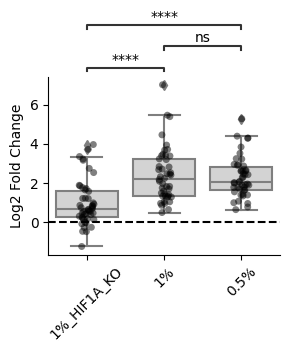

In [28]:
_,ax = plt.subplots(1, 1, figsize = (3, 4))
pairs = [('1%_HIF1A_KO', '0.5%'), ('1%_HIF1A_KO', '1%'), ('1%', '0.5%')]
order = ['1%_HIF1A_KO','1%','0.5%']
sns.boxplot(data = all_hct[all_hct['gene'].isin(lombardi_gene_list)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'lightgrey', order = order)
sns.stripplot(data = all_hct[all_hct['gene'].isin(lombardi_gene_list)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'black', alpha = .5, order = order)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)


# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Add stat annotation
annotator = Annotator(ax = ax, pairs = pairs, data = all_hct[all_hct['gene'].isin(lombardi_gene_list)], x = 'Name', y = 'log2FoldChange', order = order)
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside', comparisons_correction = 'fdr_bh')
annotator.apply_and_annotate()
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'hypoxia_marker_genes_hct_hif1a_ko.svg'), bbox_inches = 'tight')

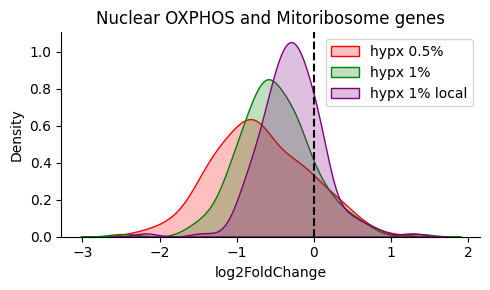

In [29]:
_, ax = plt.subplots( figsize = (5, 3))

sns.kdeplot(data = hif1a_hct[hif1a_hct['Name'].isin(oxphos_and_mitoribosome_genes)], x = 'log2FoldChange', ax = ax, fill = True, label = 'HIF1A KO', alpha = .25)
sns.kdeplot(data = hct_0[hct_0['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 0.5%', color = 'red', alpha = .25)
sns.kdeplot(data = hct_1[hct_1['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1%', color = 'green', alpha = .25)
sns.kdeplot(data = hct_local[hct_local['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1% local', color = 'purple', alpha = .25)
#sns.kdeplot(data = results_df[results_df['dataset'] == 'MCF7_local'][results_df['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx local')
# Add line at x = 0
ax.axvline(x = 0, color = 'black', linestyle = '--')
# Add a line at y = 1.3
# Add title
ax.set_title('Nuclear OXPHOS and Mitoribosome genes')
sns.despine()
plt.legend()
plt.tight_layout()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1%_HIF1A_KO vs. 1%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.358e-10 U_stat=1.502e+04
1% vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.412e-03 U_stat=1.372e+04
1%_HIF1A_KO vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:7.838e-15 U_stat=1.728e+04


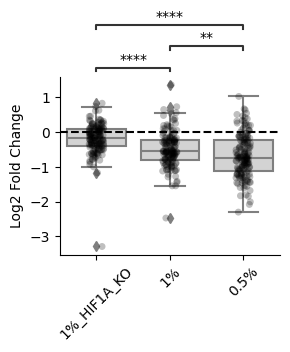

In [30]:
_,ax = plt.subplots(1, 1, figsize = (3, 4))
pairs = [('1%_HIF1A_KO', '0.5%'), ('1%_HIF1A_KO', '1%'), ('1%', '0.5%')]
sns.boxplot(data = all_hct[all_hct['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'lightgrey', order = order)
sns.stripplot(data = all_hct[all_hct['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'black', alpha = .25, order = order)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)

# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Add stat annotation
annotator = Annotator(ax = ax, pairs = pairs, data = all_hct[all_hct['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'Name', y = 'log2FoldChange', order = order)
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside', comparisons_correction = 'fdr_bh')
annotator.apply_and_annotate()
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'nuclear_oxphos_genes_hct_hif1a_ko.svg'), bbox_inches = 'tight')

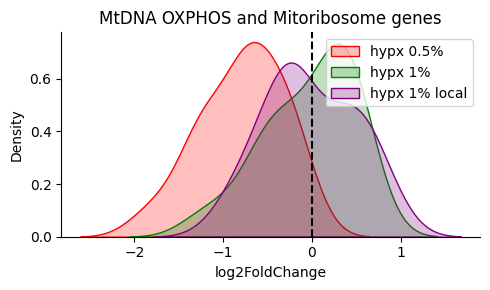

In [31]:
_, ax = plt.subplots( figsize = (5, 3))
from consts import MT_GENES
sns.kdeplot(data = hif1a_hct[hif1a_hct['Name'].isin(MT_GENES)], x = 'log2FoldChange', ax = ax, fill = True, label = 'HIF1A KO', alpha = .25)
sns.kdeplot(data = hct_0[hct_0['gene'].isin(MT_GENES)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 0.5%', color = 'red', alpha = .25)
sns.kdeplot(data = hct_1[hct_1['gene'].isin(MT_GENES)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1%', color = 'green', alpha = .25)
sns.kdeplot(data = hct_local[hct_local['gene'].isin(MT_GENES)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1% local', color = 'purple', alpha = .25)
#sns.kdeplot(data = results_df[results_df['dataset'] == 'MCF7_local'][results_df['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx local')
# Add line at x = 0
ax.axvline(x = 0, color = 'black', linestyle = '--')
# Add a line at y = 1.3
# Add title
ax.set_title('MtDNA OXPHOS and Mitoribosome genes')
sns.despine()
plt.legend()
plt.tight_layout()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1%_HIF1A_KO vs. 1%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.249e-01 U_stat=7.500e+01
1% vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.709e-04 U_stat=1.950e+02
1%_HIF1A_KO vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.150e-01 U_stat=1.510e+02


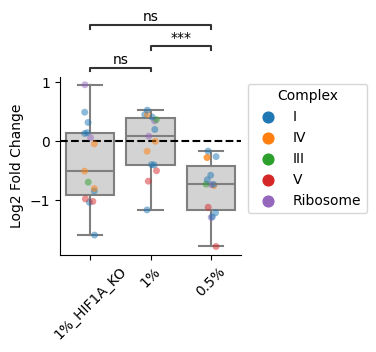

In [32]:
_,ax = plt.subplots(1, 1, figsize = (4, 4))
pairs = [('1%_HIF1A_KO', '0.5%'), ('1%_HIF1A_KO', '1%'), ('1%', '0.5%')]
sns.boxplot(data = all_hct[all_hct['gene'].isin(MT_GENES)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'lightgrey', order = order)
sns.stripplot(data = all_hct[all_hct['gene'].isin(MT_GENES)], x = 'Name', y = 'log2FoldChange', ax = ax,  alpha = .5, order = order, hue = 'Complex', dodge = False)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
# Xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Add stat annotation
annotator = Annotator(ax = ax, pairs = pairs, data = all_hct[all_hct['gene'].isin(MT_GENES)], x = 'Name', y = 'log2FoldChange', order = order)
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside', comparisons_correction = 'fdr_bh')
annotator.apply_and_annotate()
# Legend outside
plt.legend(title = 'Complex', bbox_to_anchor = (1, 1))
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'MT_GENES_oxphos_genes_hct_hif1a_ko.svg'), bbox_inches = 'tight')

In [33]:
# Remove duplicate labels
hif1a_hct = hif1a_hct.loc[:, ~hif1a_hct.columns.duplicated()]

# Filter the DataFrame
hif1a_hct_filtered = hif1a_hct[hif1a_hct['gene'].isin(consts.MTDNA_GENE_ORDER)]
hif1a_hct_filtered

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,dataset,KO,cell_line,Oxygen Concentration,Complex,Description,Protein_type,Genome,Name
13301,MT-ND6,6951.371865,0.491531,0.185484,2.649996,8.049270e-03,3.785728e-02,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,I,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13305,MT-CO2,129272.949630,-0.511419,0.190980,-2.677870,7.409200e-03,3.552297e-02,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,IV,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13313,MT-CYB,60846.258777,-0.698668,0.207460,-3.367722,7.579200e-04,5.614392e-03,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,III,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13330,MT-ND2,11771.739646,-1.598558,0.180761,-8.843508,9.275903e-19,1.156576e-16,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,I,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13334,MT-ND5,53149.702256,0.317353,0.160006,1.983379,4.732514e-02,1.468374e-01,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,I,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13341,MT-CO1,183883.333008,-0.047399,0.190794,-0.248427,8.038037e-01,8.973645e-01,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,IV,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13362,MT-ND3,11224.219137,-1.040989,0.522452,-1.992508,4.631532e-02,1.445636e-01,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,I,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13381,MT-ND4,130903.705864,0.143187,0.170610,0.839265,4.013207e-01,6.127970e-01,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,I,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13383,MT-ND1,27431.785442,-0.849994,0.162177,-5.241134,1.595930e-07,3.572960e-06,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,I,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO
13388,MT-ATP6,20874.022253,-1.025473,0.168891,-6.071811,1.264759e-09,4.393012e-08,HCT-116_HIF1A_KO,HIF1A,HCT-116,1,V,nuclear_oxphos_genes,Structural,MT,1%_HIF1A_KO


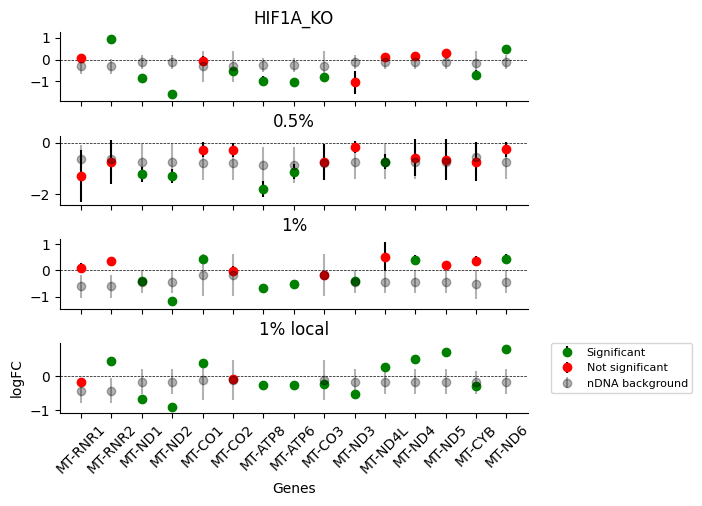

In [34]:
reload(utils)
utils.plot_gene_list(dfs = [hif1a_hct, hct_0, hct_1, hct_local], names = ['HIF1A_KO', '0.5%', '1%', '1% local'], gene_list = consts.MTDNA_GENE_ORDER , custom_order =  consts.MTDNA_GENE_ORDER, gene_list_name = 'MtDNA Genes', prefixes = None, figsize = (7, 5), random_bg = False)

In [48]:
# Load the hif1B KO MCF7 data
hif1_df = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_MCF7_HIF1B_KO_hypx.csv')).rename(columns = {'Unnamed: 0' : 'Name'})
hif1_df['dataset'] = 'MCF7_hypx_HIF1B_KO'
hif1_df['KO'] = 'HIF1B'
hif1_df['cell_line'] = 'MCF7'
hif1_df['Oxygen Concentration'] = 1
# Merge with GENELIST_DF
hif1_df = hif1_df.merge(consts.GENELIST_DF, on = 'Name',  how = 'left')
hif1_df = hif1_df.rename(columns = {'Name' : 'gene'})
hif1_df['Name'] = '1%_HIF1B_KO'

reload(utils)
utils.mitonuclear_coordination(hif1_df, nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')
utils.mitonuclear_coordination(results_df[results_df['dataset'] == 'MCF7_hypx_1'], nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')
utils.mitonuclear_coordination(results_df[results_df['dataset'] == 'MCF7_local'], nuc_gene_thresh = 15, mt_gene_thresh = 3, padj_thresh = .05, genes = 'OXPHOS', lfc_col = 'log2FoldChange')

Out of 1 datasets, 0 datasets were skipped due to insufficient genes.
1 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.03 +- 0.00
Out of 1 datasets, 0 datasets were skipped due to insufficient genes.
1 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.20 +- 0.00
Not enough OXPHOS genes in MCF7_local (MT: 10, NUC: 7). Skipping...
Out of 1 datasets, 1 datasets were skipped due to insufficient genes.
0 datasets were coordinated, and 0 datasets were uncoordinated.
The magnitude of coordination was 0.06 +- 0.00


([],
 [],
 ['MCF7_local'],
 {'MCF7_local': 0.06118881118881119},
 {'MCF7_local': 0.07954545454545454},
 {'MCF7_local': 0.7692307692307693})

In [50]:
results_df[results_df['cell_line'] == 'MCF7']['dataset'].unique()

array(['MCF7_hypx_2', 'MCF7_hypx_1', 'MCF7_local'], dtype=object)

In [51]:

mcf7_1 = results_df[results_df['dataset'] == 'MCF7_hypx_1']
mcf7_1['Name'] = '1%'
mcf7_1['KO'] = 'WT'
mcf7_1['sign'] = mcf7_1['padj'] < 0.05
mcf7_1['logpadj'] = -np.log10(mcf7_1['padj'])

mcf7_0 = results_df[results_df['dataset'] == 'MCF7_hypx_2']
mcf7_0['Name'] = '0.5%'
mcf7_0['KO'] = 'WT'
mcf7_0['sign'] = mcf7_0['padj'] < 0.05
mcf7_0['logpadj'] = -np.log10(mcf7_0['padj'])

mcf7_local = results_df[results_df['dataset'] == 'MCF7_local']
mcf7_local['Name'] = '1% local'
mcf7_local['KO'] = 'WT'
mcf7_local['sign'] = mcf7_local['padj'] < 0.05
mcf7_local['logpadj'] = -np.log10(mcf7_local['padj'])

all_mcf7 = pd.concat([hif1_df, mcf7_1, mcf7_0, mcf7_local], axis = 0)
all_mcf7.to_csv(os.path.join(PATH, 'data', 'all_mcf7_and_ko.csv'), index = False)

C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\505723871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcf7_1['Name'] = '1%'
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\505723871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcf7_1['KO'] = 'WT'
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\505723871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1978917334.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = results_df[results_df['dataset'] == 'MCF7_hypx_1'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1978917334.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = results_df[results_df['dataset'] == 'MCF7_hypx_2'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[2], hue = 'Genome', hue_order = ['NUC', 'MT'])
C:\Users\shtolz\AppData\Local\Temp\ipykernel_9328\1978917334.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(data = results_df[results_df['dataset']

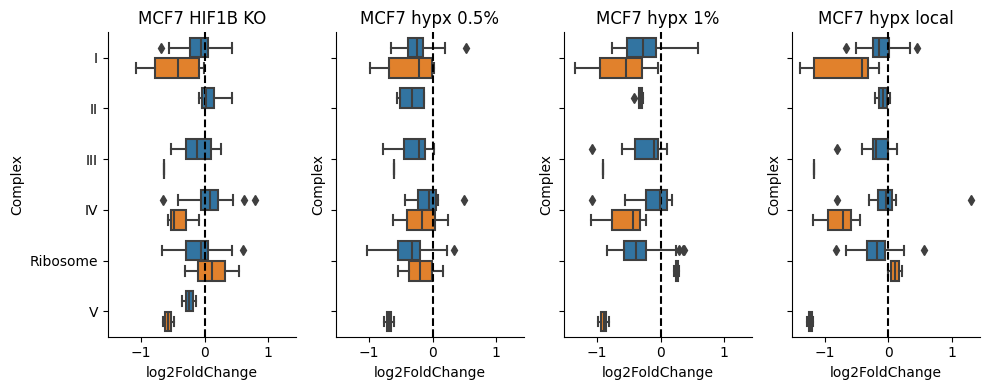

In [52]:
_, ax = plt.subplots(1, 4, figsize = (10, 4), sharex=True, sharey=True)
sns.boxplot(data = hif1_df[hif1_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[0], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = results_df[results_df['dataset'] == 'MCF7_hypx_1'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[1], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = results_df[results_df['dataset'] == 'MCF7_hypx_2'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[2], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.boxplot(data = results_df[results_df['dataset'] == 'MCF7_local'][results_df['Complex'].isin(['I', 'II', 'III', 'IV', 'V', 'Ribosome'])].sort_values('Complex'), y = 'Complex', x = 'log2FoldChange', ax = ax[3], hue = 'Genome', hue_order = ['NUC', 'MT'])
sns.despine()
plt.tight_layout()
# Add line for 0
ax[0].axvline(x = 0, color = 'black', linestyle = '--')
ax[0].set_title('MCF7 HIF1B KO')
ax[1].axvline(x = 0, color = 'black', linestyle = '--')
ax[1].set_title('MCF7 hypx 0.5%')
ax[2].axvline(x = 0, color = 'black', linestyle = '--')
ax[2].set_title('MCF7 hypx 1%')
ax[3].axvline(x = 0, color = 'black', linestyle = '--')
ax[3].set_title('MCF7 hypx local')
# Remove all legends
for i in ax:
    i.get_legend().remove()
plt.tight_layout()


In [56]:
all_mcf7.Name.unique()

array(['1%_HIF1B_KO', '1%', '0.5%', '1% local'], dtype=object)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1%_HIF1B_KO vs. 1%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.682e-01 U_stat=1.080e+02
1% vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:2.455e-01 U_stat=1.410e+02
1%_HIF1B_KO vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.306e-01 U_stat=1.320e+02


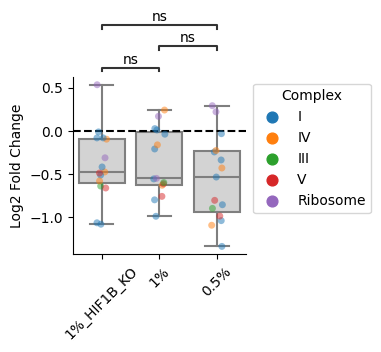

In [64]:
order = ['1%_HIF1B_KO','1%','0.5%']

_,ax = plt.subplots(1, 1, figsize = (4, 4))
pairs = [('1%_HIF1B_KO', '0.5%'), ('1%_HIF1B_KO', '1%'), ('1%', '0.5%')]
sns.boxplot(data = all_mcf7[all_mcf7['gene'].isin(MT_GENES)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'lightgrey', order = order)
sns.stripplot(data = all_mcf7[all_mcf7['gene'].isin(MT_GENES)], x = 'Name', y = 'log2FoldChange', ax = ax,  alpha = .5, order = order, hue = 'Complex', dodge = False)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
# Xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Add stat annotation
annotator = Annotator(ax = ax, pairs = pairs, data = all_mcf7[all_mcf7['gene'].isin(MT_GENES)], x = 'Name', y = 'log2FoldChange', order = order)
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside', comparisons_correction = 'fdr_bh')
annotator.apply_and_annotate()
# Legend outside
plt.legend(title = 'Complex', bbox_to_anchor = (1, 1))
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'MT_GENES_oxphos_genes_mcf7_hif1b_ko.svg'), bbox_inches = 'tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1%_HIF1B_KO vs. 1%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:5.229e-14 U_stat=1.569e+04
1% vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:4.057e-01 U_stat=1.088e+04
1%_HIF1B_KO vs. 0.5%: Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.754e-13 U_stat=1.548e+04


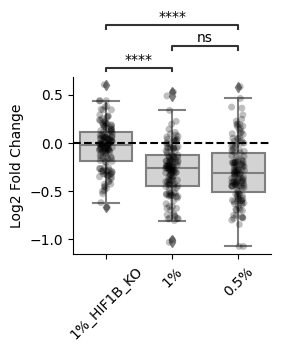

In [69]:
order = ['1%_HIF1B_KO','1%','0.5%']

_,ax = plt.subplots(1, 1, figsize = (3, 4))
pairs = [('1%_HIF1B_KO', '0.5%'), ('1%_HIF1B_KO', '1%'), ('1%', '0.5%')]
sns.boxplot(data = all_mcf7[all_mcf7['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'Name', y = 'log2FoldChange', ax = ax, color = 'lightgrey', order = order)
sns.stripplot(data = all_mcf7[all_mcf7['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'Name', y = 'log2FoldChange', ax = ax,   order = order,color = 'black', alpha = .25)
ax.set_xlabel('')
ax.set_ylabel('Log2 Fold Change')
# Xticklabels rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Add stat annotation
annotator = Annotator(ax = ax, pairs = pairs, data = all_mcf7[all_mcf7['gene'].isin(oxphos_and_mitoribosome_genes)], x = 'Name', y = 'log2FoldChange', order = order)
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside', comparisons_correction = 'fdr_bh')
annotator.apply_and_annotate()
# Legend outside
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'nuclear_oxphos_mitoribosome_genes_mcf7_hif1b_ko.svg'), bbox_inches = 'tight')

C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shtolz\AppData\Local\Temp\ipykernel_11312\4289676073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcf_hypx_1['sign'] = mcf_hypx_1['padj'] < 0.05
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shtolz\AppData\Local\Temp\ipykernel_

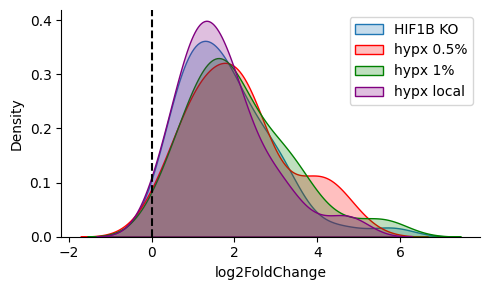

In [47]:
_, ax = plt.subplots( figsize = (5, 3))
hif1_df['sign'] = hif1_df['padj'] < 0.05
hif1_df['logpadj'] = -np.log10(hif1_df['padj'])
mcf_hypx_1 = results_df[results_df['dataset'] == 'MCF7_hypx_1']
mcf_hypx_1['sign'] = mcf_hypx_1['padj'] < 0.05
mcf_hypx_1['logpadj'] = -np.log10(mcf_hypx_1['padj'])
mcf_hypx_2 = results_df[results_df['dataset'] == 'MCF7_hypx_2']
mcf_hypx_2['sign'] = mcf_hypx_2['padj'] < 0.05
mcf_hypx_2['logpadj'] = -np.log10(mcf_hypx_2['padj'])
mcf_local = results_df[results_df['dataset'] == 'MCF7_local']
mcf_local['sign'] = mcf_local['padj'] < 0.05
mcf_local['logpadj'] = -np.log10(mcf_local['padj'])
sns.kdeplot(data = hif1_df[hif1_df['Name'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'HIF1B KO', alpha = .25)
sns.kdeplot(data = mcf_hypx_1[mcf_hypx_1['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 0.5%', color = 'red', alpha = .25)
sns.kdeplot(data = mcf_hypx_2[mcf_hypx_2['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx 1%', color = 'green', alpha = .25)
sns.kdeplot(data = mcf_local[mcf_local['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx local', color = 'purple', alpha = .25)
#sns.kdeplot(data = results_df[results_df['dataset'] == 'MCF7_local'][results_df['gene'].isin(lombardi_gene_list)], x = 'log2FoldChange', ax = ax, fill = True, label = 'hypx local')
# Add line at x = 0
ax.axvline(x = 0, color = 'black', linestyle = '--')
# Add a line at y = 1.3
sns.despine()
plt.legend()
plt.tight_layout()


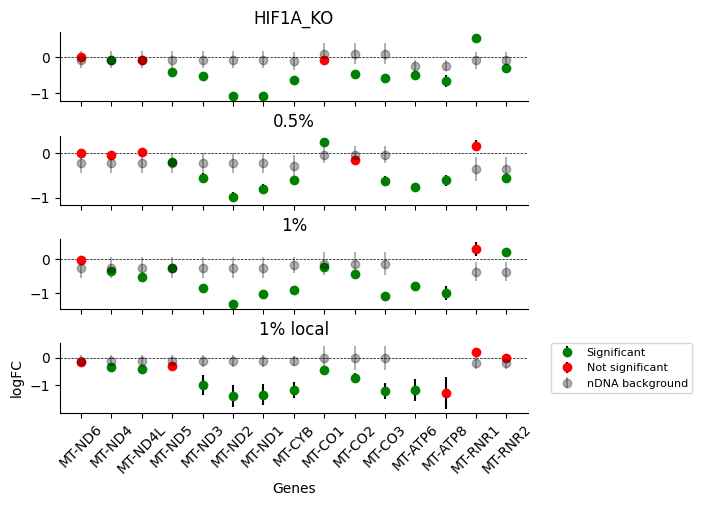

In [48]:
reload(utils)
utils.plot_gene_list([hif1_df.rename(columns = {'Name' : 'gene'}), mcf_hypx_1, mcf_hypx_2, mcf_local], names = ['HIF1A_KO', '0.5%', '1%', '1% local'], gene_list = consts.MT_GENES, gene_list_name = 'MtDNA Genes', prefixes = None, figsize = (7, 5), random_bg = False)

In [49]:
mean_pos_lfc = results_df[results_df['oxphos_lfc'] > 0]['oxphos_lfc'].median()
std_pos_lfc = results_df[results_df['oxphos_lfc'] > 0]['oxphos_lfc'].std()
mean_neg_lfc = results_df[results_df['oxphos_lfc'] < 0]['oxphos_lfc'].median()
std_neg_lfc = results_df[results_df['oxphos_lfc'] < 0]['oxphos_lfc'].std()
two_std_pos = mean_pos_lfc + 2*std_pos_lfc
two_std_neg = mean_neg_lfc - 2*std_neg_lfc

results_df = results_df.assign(oxphos_expression = lambda x: x['oxphos_lfc'].map(lambda expr: 'Upregulated' if expr > two_std_pos else 'Downregulated' if expr <= two_std_neg else 'Unchanged'))

In [50]:
results_df[results_df['oxphos_expression'] == 'Downregulated'].cell_line.unique()

array(['T47D', 'HCT-116'], dtype=object)

In [51]:
results_df['Oxygen Concentration'].unique()

array([1. , 0.2, 0.5])

In [52]:
# Classify the datasets as low or high OXPHOS expression based on the median LFC of the OXPHOS genes
binary_colormap = {True : 'orangered', False : 'lightgray'}
oxy_conc = {1 : 'darkorange', 0.5 : 'tomato', 0.2 : 'firebrick'}
results_df['responder'] = results_df['oxphos_coordination'].map({'Coordinated' : 'Responder', 'Uncoordinated' : 'Responder', 'Unassigned' : 'Non-responder'})
results_df['ribo_responder'] = results_df['ribosome_coordination'].map({'Coordinated' : 'Responder', 'Uncoordinated' : 'Responder', 'Unassigned' : 'Non-responder'})
results_df['cell_type'] = results_df['dataset'].apply(lambda x: x.split('_')[0].split(' ')[0].upper())
results_df['Genome'] = results_df['Genome'].fillna('NUC')
results_annot = results_df.groupby('dataset').agg({'cell_type' : 'first', 'responder' : 'first', 'Oxygen Concentration' : 'first'}).reset_index()

colors = dict(zip(results_annot['cell_type'].unique(), sns.color_palette('tab20', n_colors = len(results_annot['cell_type'].unique()))))

results_annot['Cell Type'] = results_annot['cell_type'].map(colors)
results_annot['Responder'] = results_annot['responder'].map({'Responder' : 'green', 'Non-responder' : 'tab:grey'})
results_annot['Oxygen Concentration'] = results_annot['Oxygen Concentration'].map(oxy_conc)
results_annot = results_annot.set_index('dataset')
display(results_annot.head(2))

gene_annot = results_df.groupby('gene').agg({'Genome' : 'first', 'Complex' : 'first', 'Description' : 'first'}).reset_index().set_index('gene')
# Add ap1 annotation
gene_annot['AP1'] = gene_annot.index.isin(consts.AP1)
gene_annot['Mitocarta'] = gene_annot.index.isin(mitocarta_genes)
gene_annot['Mitocarta'] = gene_annot['Mitocarta'].map(binary_colormap)
gene_annot['TargetP'] = gene_annot.index.isin(mt_targeted)
gene_annot['TargetP'] = gene_annot['TargetP'].map(binary_colormap)

gene_annot['HIF1A'] = gene_annot.index.isin(hif1)
gene_annot['HIF1A'] = gene_annot['HIF1A'].map(binary_colormap)
genome_colors = {'NUC' : 'blue', 'MT' : 'red'}
gene_annot['Genome'] = gene_annot['Genome'].map(genome_colors)
gene_annot['Complex'] = gene_annot['Complex'].map({'I' : 'green', 'II' : 'orange', 'III' : 'purple', 'IV' : 'brown', 'V' : 'pink', 'Ribosome' : 'tab:grey'})
gene_annot['AP1'] = gene_annot['AP1'].map(binary_colormap)

reg_genes_annot = gene_annot.loc[[i.upper() for i in reg_genes_mat.index if i in gene_annot.index],:]
tf_genes_annot = gene_annot.loc[[i.upper() for i in tf_genes_mat.index if i in gene_annot.index],:]
display(tf_genes_annot.head(2))

,cell_type,responder,Oxygen Concentration,Cell Type,Responder
dataset,,,,,
A549_hypx_0,A549,Non-responder,tomato,"(0.12156862745098039, 0.4666666666666667, 0.70...",tab:grey
A549_hypx_1,A549,Non-responder,darkorange,"(0.12156862745098039, 0.4666666666666667, 0.70...",tab:grey


,Genome,Complex,Description,AP1,Mitocarta,TargetP,HIF1A
gene,,,,,,,
RORA,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
BHLHE40,blue,NaN,None,lightgray,lightgray,lightgray,orangered


In [53]:
# Generate a list of genes whose log2FoldChange values significantly change between Responder and Non-responder datasets
responder_genes = []
ribo_responder_genes = []

for gene in reg_genes:
    responders_lfc = results_df[(results_df['gene'] == gene) & (results_df['responder'] == 'Responder')]['log2FoldChange']
    non_responders_lfc = results_df[(results_df['gene'] == gene) & (results_df['responder'] == 'Non-responder')]['log2FoldChange']

    rib_responders_lfc = results_df[(results_df['gene'] == gene) & (results_df['ribo_responder'] == 'Responder')]['log2FoldChange']
    rib_non_responders_lfc = results_df[(results_df['gene'] == gene) & (results_df['ribo_responder'] == 'Non-responder')]['log2FoldChange']
    if len(rib_responders_lfc) == 0 or len(rib_non_responders_lfc) == 0: ribo_switch = False
    else: ribo_switch = True
    if len(responders_lfc) == 0 or len(non_responders_lfc) == 0:
        continue
    res = stats.mannwhitneyu(responders_lfc, non_responders_lfc)
    if ribo_switch:
        rib_res = stats.mannwhitneyu(rib_responders_lfc, rib_non_responders_lfc)
        if rib_res[1] < 0.05:
            ribo_responder_genes.append(gene)
    if res[1] < 0.05:
        responder_genes.append(gene)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Responder vs. Non-responder: Mann-Whitney-Wilcoxon test two-sided, P_val:1.204e-01 U_stat=9.400e+01


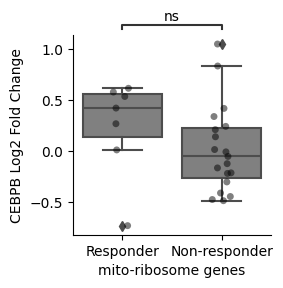

In [54]:
_, ax = plt.subplots(figsize = (3, 3))
gene = 'CEBPB'
sns.boxplot(ax = ax, data = results_df[(results_df['gene'] == gene)], x = 'ribo_responder', y = 'log2FoldChange', color = 'grey')
sns.stripplot(ax = ax, data = results_df[(results_df['gene'] == gene)], x = 'ribo_responder', y = 'log2FoldChange', color = 'black', alpha = .5)

# Add stat annotation
annotator = Annotator(ax = ax, pairs = [('Responder', 'Non-responder')], data = results_df[(results_df['gene'] == gene)], x = 'ribo_responder', y = 'log2FoldChange')
annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside')
annotator.apply_and_annotate()
# Despine
sns.despine()
# Set axis labels
ax.set_xlabel('mito-ribosome genes')
ax.set_ylabel(f'{gene} Log2 Fold Change')
# Tight
plt.tight_layout()
# Savefig
#plt.savefig(os.path.join(PATH, 'figures', f'{gene}_ribo_responder.svg'), dpi = 300, bbox_inches = 'tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-responder vs. Responder: Mann-Whitney-Wilcoxon test two-sided, P_val:1.058e-02 U_stat=1.290e+02
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-responder vs. Responder: Mann-Whitney-Wilcoxon test two-sided, P_val:2.872e-02 U_stat=3.800e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Non-responder vs. Responder: Mann-Whitney-Wilcoxon test two-sided, P_val:2.187e-02 U_stat=3.600e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1

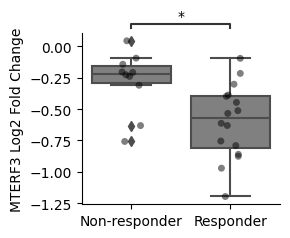

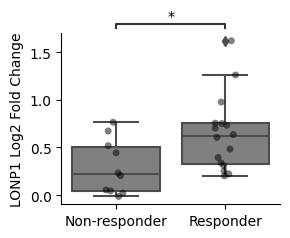

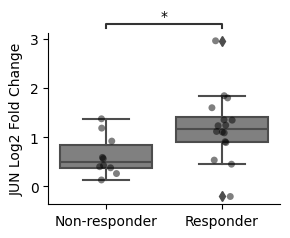

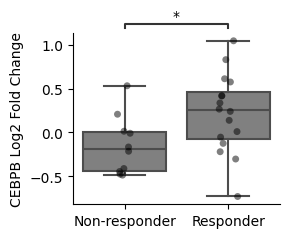

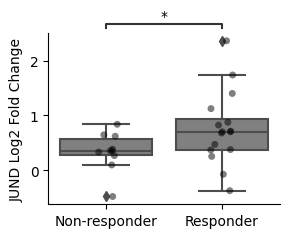

In [55]:
genes = ['MTERF3', 'LONP1', 'JUN', 'CEBPB', 'JUND']
order = ['Non-responder', 'Responder']
for gene in genes:
    _, ax = plt.subplots(figsize = (3, 2.5))
    sns.boxplot(ax = ax, data = results_df[(results_df['gene'] == gene)], x = 'responder', y = 'log2FoldChange', color = 'grey', order = order)
    sns.stripplot(ax = ax, data = results_df[(results_df['gene'] == gene)], x = 'responder', y = 'log2FoldChange', color = 'black', alpha = .5, order = order)

    # Add stat annotation
    annotator = Annotator(ax = ax, pairs = [('Responder', 'Non-responder')], data = results_df[(results_df['gene'] == gene)], x = 'responder', y = 'log2FoldChange', order = order)
    annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside')
    annotator.apply_and_annotate()
    # Despine
    sns.despine()
    # Set axis labels
    ax.set_xlabel('')
    ax.set_ylabel(f'{gene} Log2 Fold Change')
    # Tight
    plt.tight_layout()
    # Savefig
    plt.savefig(os.path.join(PATH, 'figures', f'{gene}_responder.svg'), bbox_inches = 'tight')

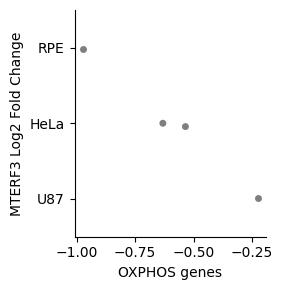

In [56]:
_, ax = plt.subplots(figsize = (3, 3))
gene = 'MTERF3'
rel_df = results_df[(results_df['gene'] == gene) & (results_df['cell_line'].isin(['U87', 'HeLa', 'RPE']))]
#sns.barplot(ax = ax, data = rel_df, y = 'cell_line', x = 'log2FoldChange', )
sns.stripplot(ax = ax, data = rel_df, y = 'cell_line', x = 'log2FoldChange',  alpha = .5, color = 'black')

# Add stat annotation
#annotator = Annotator(ax = ax, pairs = [('Responder', 'Non-responder')], data = results_df[(results_df['gene'] == gene)], x = 'responder', y = 'log2FoldChange')
#annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'outside')
#annotator.apply_and_annotate()
# Despine
sns.despine()
# Set axis labels
ax.set_xlabel('OXPHOS genes')
ax.set_ylabel(f'{gene} Log2 Fold Change')
# Tight
plt.tight_layout()
# Savefig
#plt.savefig(os.path.join(PATH, 'figures', f'{gene}_responder.svg'), dpi = 300, bbox_inches = 'tight')

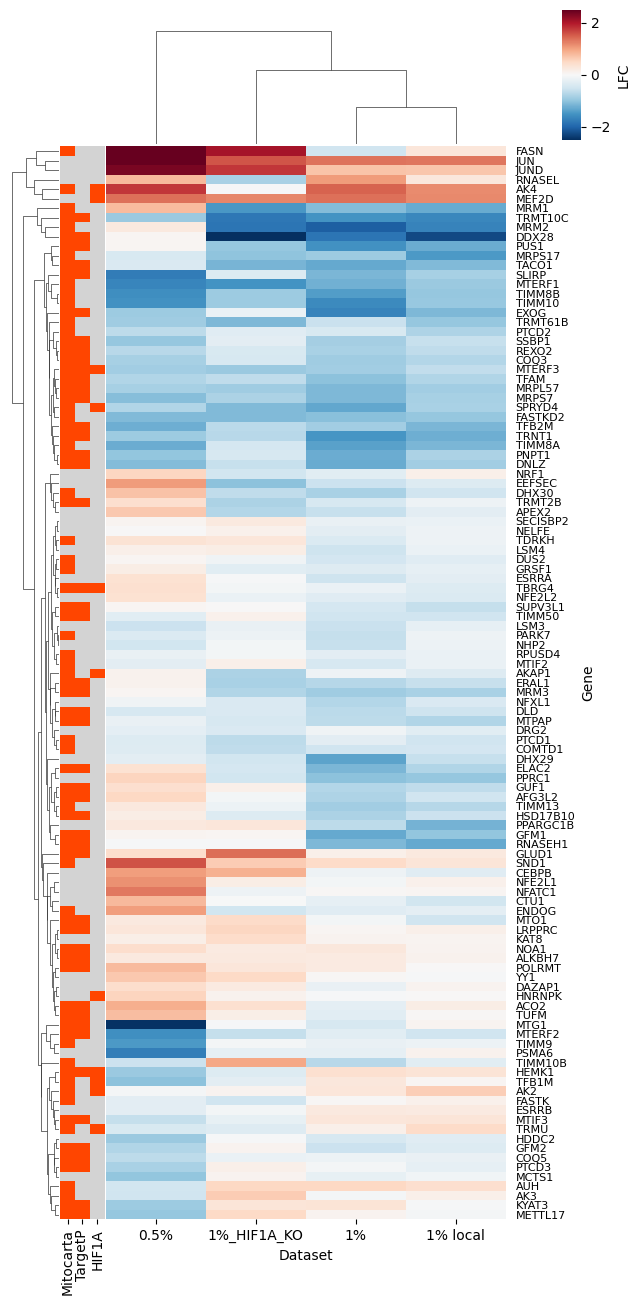

In [57]:
reload(utils)
utils.plot_gene_clustermap(mat = reg_genes_hif1a_mat, row_annot = gene_annot,  row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], yticklabels = 1, xticklabels = True, savefig = 'hif1a_reg_genes_heatmap.svg', figsize = (6.3, 13))

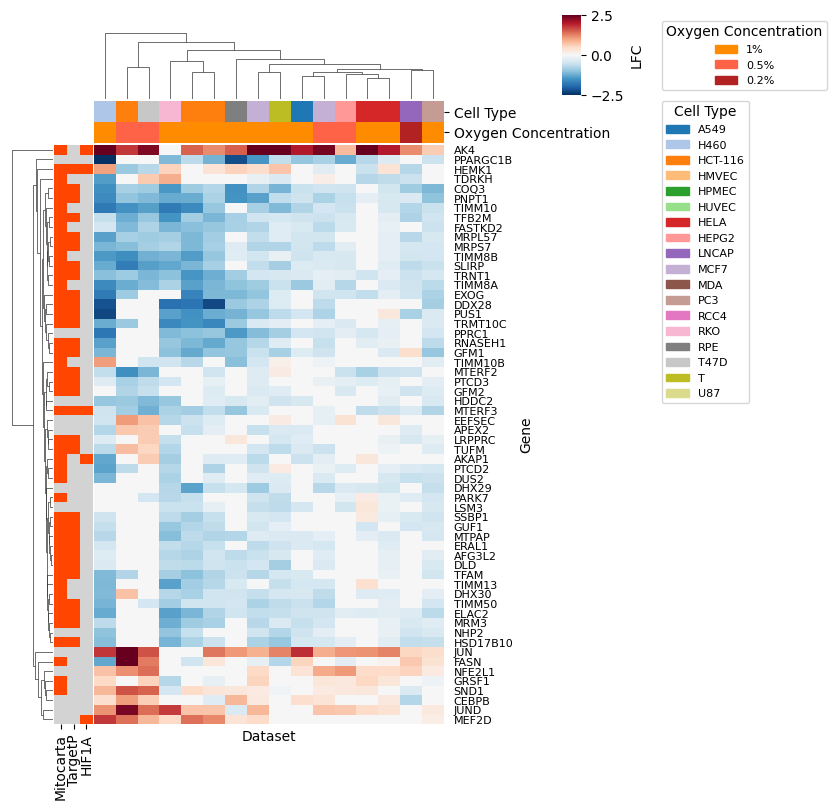

In [58]:
reload(utils)
reg_genes_mat_all = results_df_mat_all.loc[reg_genes_mat.index, :]
utils.plot_gene_clustermap(mat = reg_genes_mat, col_annot = results_annot, row_annot = gene_annot, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], yticklabels = 1, col_annot_dicts = [colors, oxy_conc], savefig = 'reg_genes_heatmap.svg', figsize = (6.3, 8))

In [59]:
gene_annot

,Genome,Complex,Description,AP1,Mitocarta,TargetP,HIF1A
gene,,,,,,,
5S_RRNA.1,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
5S_RRNA.12,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
5S_RRNA.15,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
5S_RRNA.3,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
5S_RRNA.5,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
...,...,...,...,...,...,...,...
ZYG11A,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
ZYG11B,blue,NaN,None,lightgray,lightgray,lightgray,lightgray
ZYX,blue,NaN,None,lightgray,lightgray,lightgray,lightgray


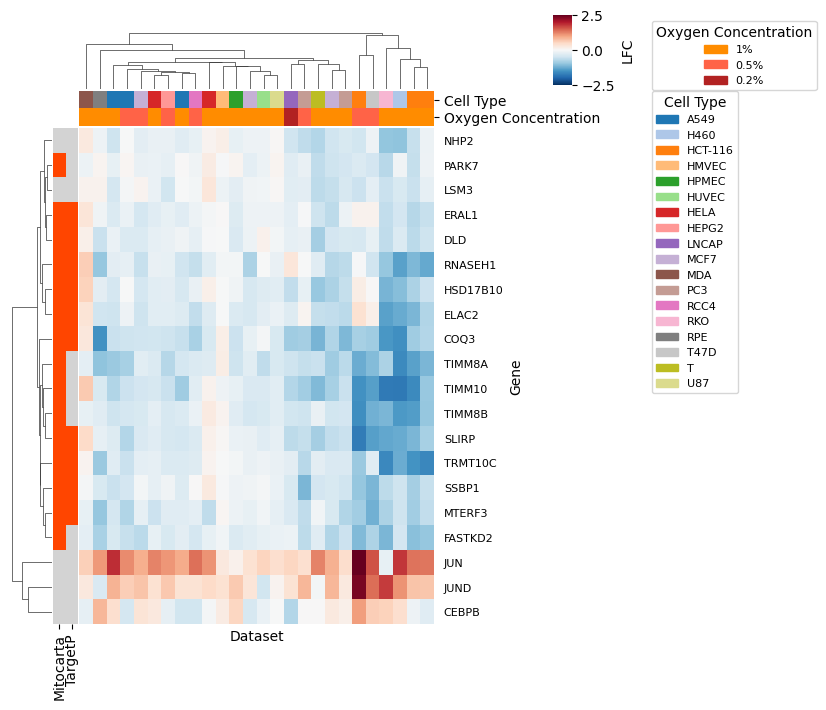

In [60]:
responder_reg_genes = [i for i in reg_genes_mat.index if ('MRP' not in i) and (i in responder_genes)]
reg_genes_mat_interesting = reg_genes_mat_all.loc[responder_reg_genes,:]

utils.plot_gene_clustermap(mat = reg_genes_mat_interesting, col_annot = results_annot, row_annot = gene_annot, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP'], yticklabels = 1, col_annot_dicts = [colors, oxy_conc], savefig = 'reg_genes_responder_heatmap.svg', figsize = (6.2, 7))

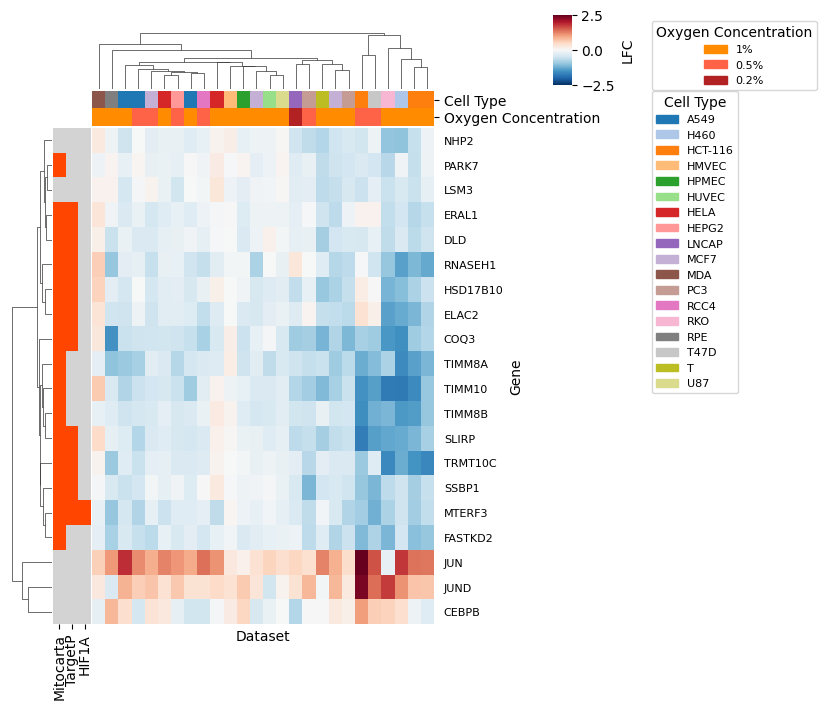

In [51]:
responder_reg_genes = [i for i in reg_genes_mat.index if ('MRP' not in i) and (i in responder_genes)]
reg_genes_mat_interesting = reg_genes_mat_all.loc[responder_reg_genes,:]

utils.plot_gene_clustermap(mat = reg_genes_mat_interesting, col_annot = results_annot, row_annot = gene_annot, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], yticklabels = 1, col_annot_dicts = [colors, oxy_conc], savefig = 'reg_genes_responder_heatmap.svg', figsize = (6.2, 7))

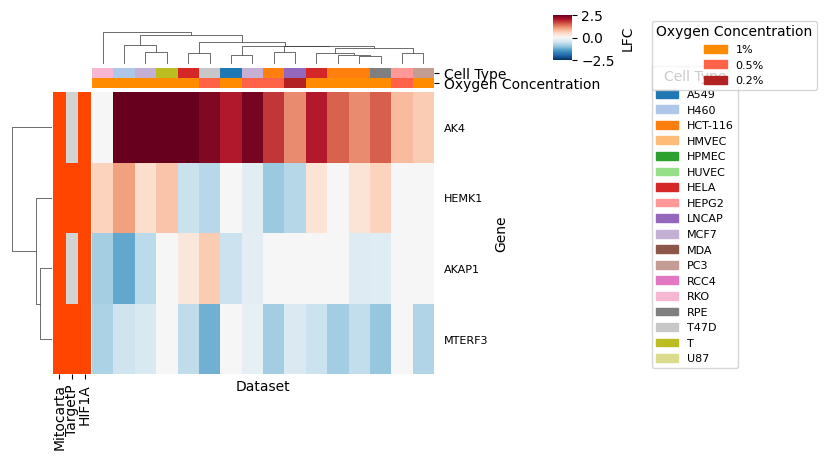

In [52]:
hif1_or_mito = [i for i in reg_genes_mat.index if (i in mitocarta_genes or i in mt_targeted) and ('MRP' not in i) and (i in hif1)]
reg_genes_mat_interesting = reg_genes_mat.loc[hif1_or_mito,:]

utils.plot_gene_clustermap(mat = reg_genes_mat_interesting, col_annot = results_annot, row_annot = gene_annot, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], yticklabels = 1, col_annot_dicts = [colors, oxy_conc], savefig = 'reg_genes_just_hif1a_mito_heatmap.svg', figsize = (6.2, 4.5))

C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


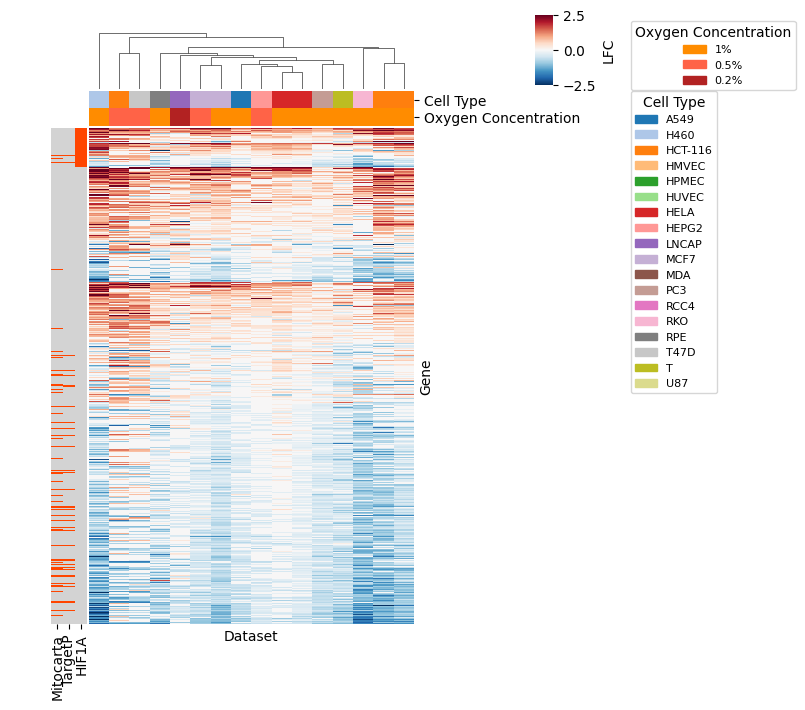

In [53]:
reload(utils)
# Set the hif1 genes first in tf_rbp_mat
tf_rbp_mat_ordered = tf_rbp_mat.loc[[i for i in tf_rbp_mat.index if i in hif1] + [i for i in tf_rbp_mat.index if i not in hif1],:]
utils.plot_gene_clustermap(mat = tf_rbp_mat_ordered, col_annot = results_annot, row_annot = gene_annot, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], yticklabels = False, col_annot_dicts = [colors, oxy_conc], savefig = 'tf_gene_heatmap.svg', figsize = (6, 7), row_cluster = False)

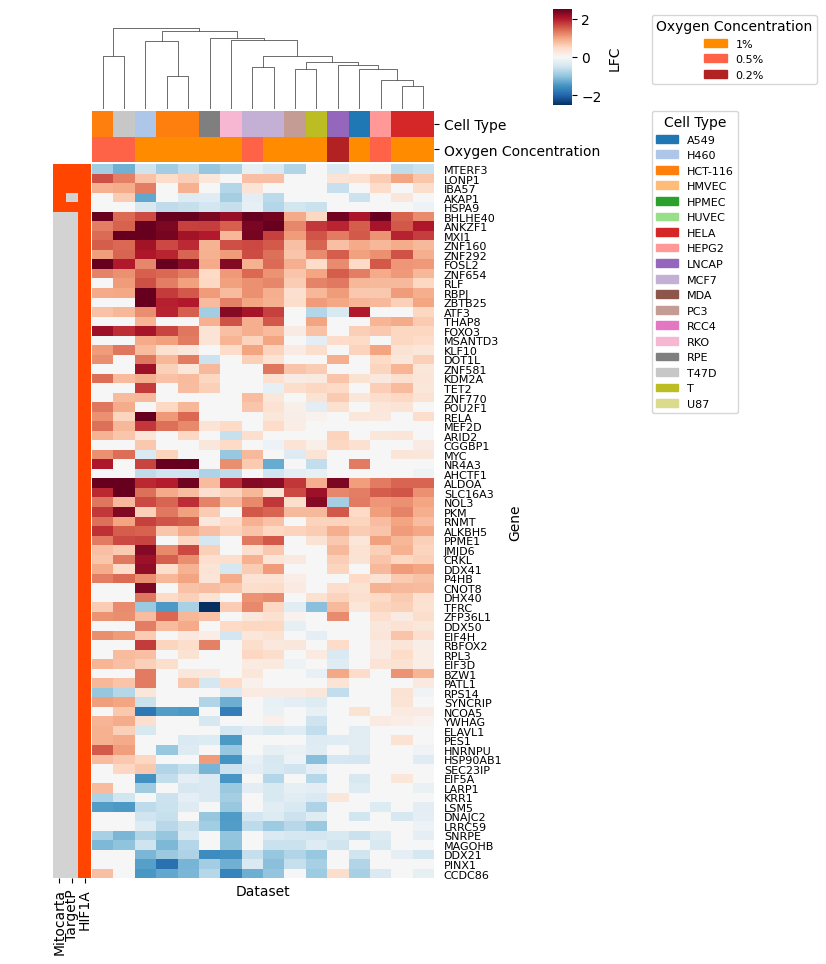

In [54]:
genes_of_interest = ['AK4', 'HNRNPK', 'TRMU', 'SPRYD4', 'AK2', 'MYC', 'AKAP1', 'FOSL2',
       'MTERF3', 'MTERF5', 'TFB1M', 'ATF3', 'HEMK1', 'MEF2D', 'TBRG4', 'JUN', 'TEFM']
labels = [i if i in mt_tf and i in hif1 else None for i in tf_rbp_mat.index]
hif1_or_mito = [i for i in tf_rbp_mat.index if (i in hif1) and ('MRP' not in i)]
tf_rbp_mat_interesting = tf_rbp_mat.loc[hif1_or_mito,:]
tf_rbp_mat_interesting_ordered = tf_rbp_mat_interesting.loc[[i for i in tf_rbp_mat_interesting.index if i in list(mt_targeted) + list(mitocarta_genes)] + [i for i in tf_rbp_mat_interesting.index if i not in list(mt_targeted) + list(mitocarta_genes)], :]
gene_annot_ordered = gene_annot.loc[tf_rbp_mat_interesting_ordered.index,:]
utils.plot_gene_clustermap(mat = tf_rbp_mat_interesting_ordered, col_annot = results_annot, row_annot = gene_annot_ordered
, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], row_cluster = False, yticklabels = 1, col_annot_dicts = [colors, oxy_conc], savefig = 'tf_gene_hif1a_mito_heatmap.svg', figsize = (6.2, 9.6))

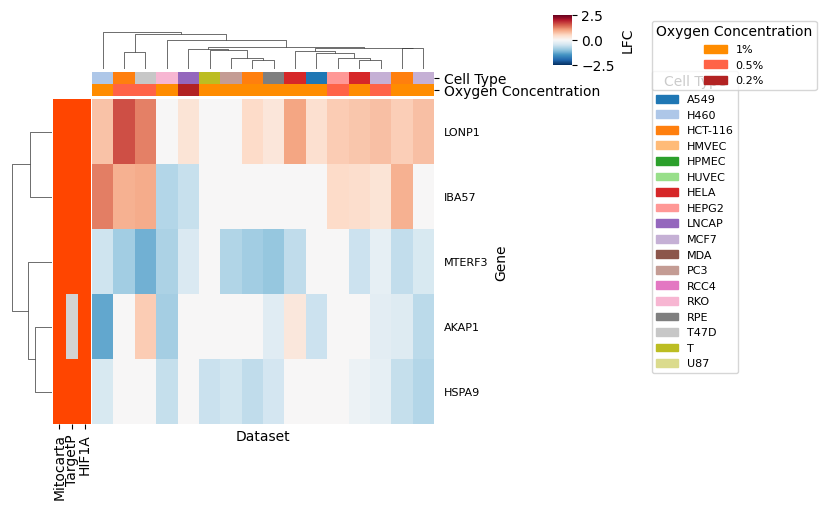

In [55]:
labels = [i if i in mt_tf and i in hif1 else None for i in tf_rbp_mat.index]
hif1_or_mito = [i for i in tf_rbp_mat.index if (i in mitocarta_genes or i in mt_targeted) and ('MRP' not in i) and (i in hif1)]
tf_rbp_mat_interesting = tf_rbp_mat.loc[hif1_or_mito,:]

utils.plot_gene_clustermap(mat = tf_rbp_mat_interesting, col_annot = results_annot, row_annot = gene_annot, col_annot_cols = ['Cell Type', 'Oxygen Concentration'], row_annot_cols = ['Mitocarta', 'TargetP', 'HIF1A'], yticklabels = 1, col_annot_dicts = [colors, oxy_conc], savefig = 'tf_gene_just_hif1a_mito_heatmap.svg', figsize = (6.2, 5))

C:\Users\shtolz\AppData\Local\Temp\ipykernel_17976\276537517.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


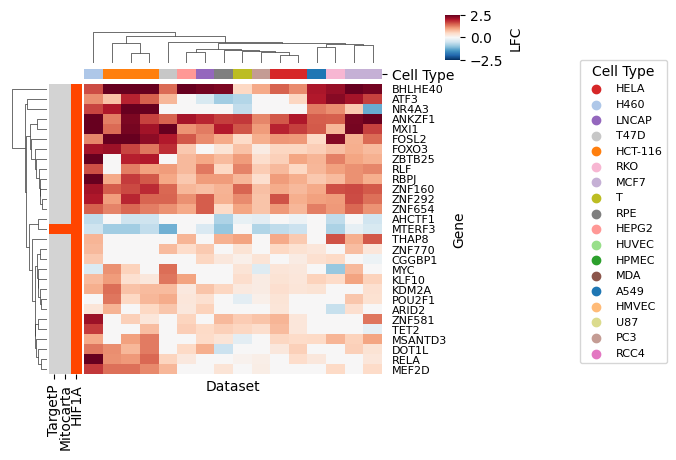

In [56]:
hif1_tf_mat = tf_genes_mat.loc[[i for i in tf_genes_mat.index if i in hif1],:]

labels = [i if i in genes_of_interest else None for i in hif1_tf_mat.index]

cm = sns.clustermap(hif1_tf_mat, cmap = 'RdBu_r', center = 0, figsize = (5,4.5), col_cluster = True, row_cluster = True, xticklabels = False, yticklabels = 1, row_colors = gene_annot[['TargetP', 'Mitocarta', 'HIF1A']], col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = False, mask = False)

# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_df['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)
# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
# Save fig
plt.savefig(os.path.join(PATH, 'figures', 'hif_tf_gene_heatmap.svg'), dpi = 300, bbox_inches = 'tight')

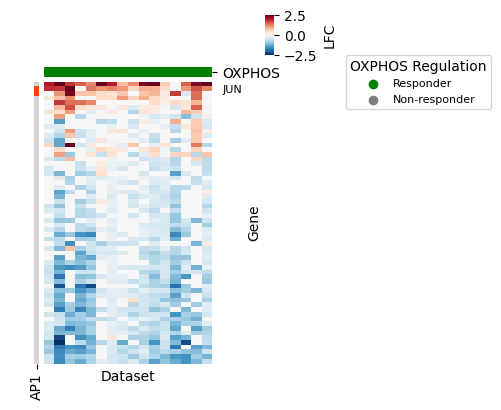

In [57]:
genes_of_interest = ['JUN']
labels = [i if i in genes_of_interest else None for i in reg_genes_mat.index]
cm = sns.clustermap(reg_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (3,4), col_cluster = False, row_cluster = False, xticklabels = False, col_colors = results_annot.rename(columns = {"Responder" :"OXPHOS"})[['OXPHOS']], row_colors = gene_annot['AP1'], cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, yticklabels = labels, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type

for label, color in zip(results_df['responder'].unique(), ['green', 'grey']):
    plt.scatter([], [], c = color, label = label)
# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'OXPHOS Regulation')

plt.savefig(os.path.join(PATH, 'figures', 'reg_genes_responder_heatmap.svg'), dpi = 300, bbox_inches = 'tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_17976\2827770261.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


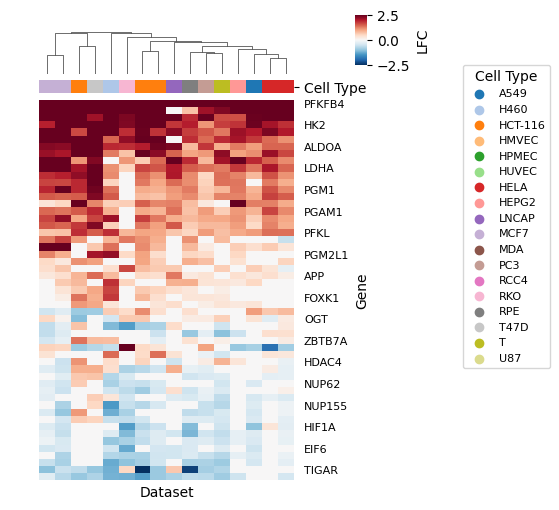

<Figure size 640x480 with 0 Axes>

In [58]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(gly_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')

plt.show()
plt.savefig(os.path.join(PATH, 'figures', 'gly_genes_clustermap.svg'), dpi = 300, bbox_inches='tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_17976\169388139.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


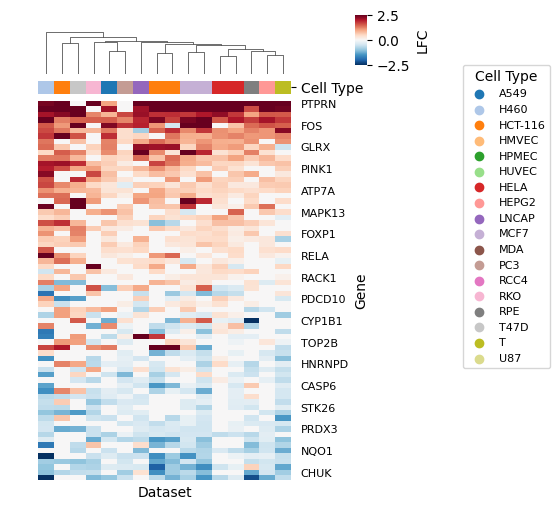

In [59]:
genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(ros_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'ros_genes_clustermap.svg'), dpi = 300, bbox_inches='tight')

C:\Users\shtolz\AppData\Local\Temp\ipykernel_17976\3250756663.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c = colors[label], label = label)


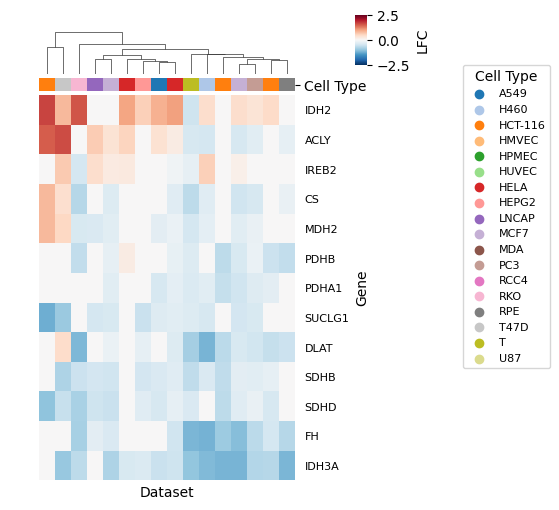

In [60]:
genes_of_interest = ['JUN', 'FOS', 'JUNB']
labels = [i if i in genes_of_interest else None for i in gly_genes_mat.index]
cm = sns.clustermap(tca_genes_mat, cmap = 'RdBu_r', center = 0, figsize = (4,5), col_cluster = True, row_cluster = False, xticklabels = False,col_colors = results_annot[['Cell Type']],cbar_kws = {'label' : 'LFC'}, dendrogram_ratio=(0.1, 0.1), cbar_pos=(0.9, 0.9, 0.03, 0.1), vmin = -2.5, vmax = 2.5, rasterized = True, mask = False)
# Remove ylabel
cm.ax_heatmap.set_ylabel('Gene')
cm.ax_heatmap.set_xlabel('Dataset')
# Add legend for cell type
for label in results_annot['cell_type'].unique():
    plt.scatter([], [], c = colors[label], label = label)

# Remove ytick lines
plt.setp(cm.ax_heatmap.yaxis.get_majorticklines(), visible=False)
plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize = 8)


plt.legend(bbox_to_anchor=(9, 0), loc=2, borderaxespad=0., fontsize = 8, title = 'Cell Type')
plt.savefig(os.path.join(PATH, 'figures', 'tca_genes_clustermap.svg'), dpi = 300, bbox_inches='tight')

<Axes: xlabel='gene', ylabel='dataset'>

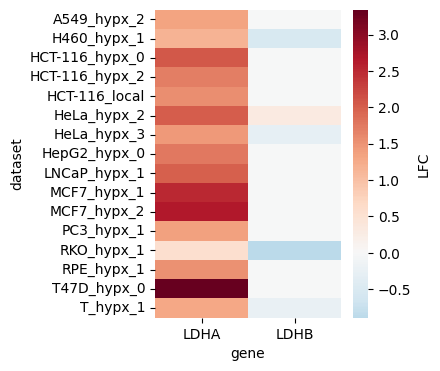

In [61]:
_, ax = plt.subplots(figsize = (3,4))
sns.heatmap(results_df_mat.loc[['LDHA', 'LDHB'], :].T, cmap = 'RdBu_r', center = 0, cbar_kws = {'label' : 'LFC'}, rasterized = True, mask = False)

In [62]:
labels

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

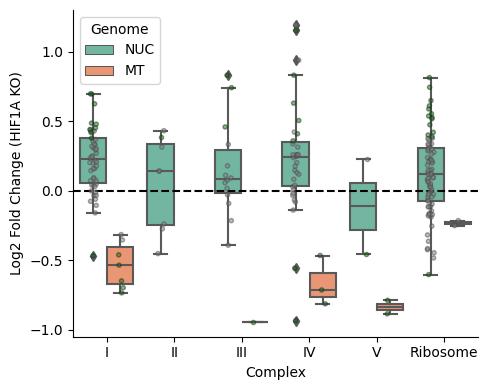

In [99]:
# In the HCT-116 HIF1A KO dataset, analyze the lfc of reg genes
order = ['I', 'II', 'III', 'IV', 'V', 'Ribosome']
hct_ko_results = pd.read_csv(os.path.join(PATH, 'data', 'results', 'res_HCT-116_hif1a_ko_normoxia_and_hypoxia.csv')).rename(columns = {'Unnamed: 0' : 'Name'})
hct_ko_results = hct_ko_results.merge(consts.GENELIST_DF, on = 'Name', how = 'left')
hct_ko_results['sign'] = hct_ko_results['padj'] < 0.05
hct_ko_results['cell_line'] = 'HCT-116'
_, ax = plt.subplots(figsize = (5,4))
sns.boxplot(x = 'Complex', y = 'log2FoldChange', data = hct_ko_results, hue = 'Genome', ax = ax, order = order, palette = 'Set2')
sns.stripplot(x = 'Complex', y = 'log2FoldChange', data = hct_ko_results[hct_ko_results['sign'] == False], hue = 'Genome', palette = ['grey'], ax = ax, dodge = True, alpha = .5, order = order, size = 3, linewidth = 1, label =  'Nonsignificant')
sns.stripplot(x = 'Complex', y = 'log2FoldChange', data = hct_ko_results[hct_ko_results['sign'] == True], hue = 'Genome', palette = ['green'], ax = ax, dodge = True, alpha = .5, order = order, size = 3, linewidth = 1, label =  'Significant')

# Remove the stripplot legend only
# Add another legend for significant and nonsignificant
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles = handles[:2], labels = labels[:2], title = 'Genome')
# Add a line at y = 0
ax.axhline(y = 0, color = 'black', linestyle = '--')
# Despine
sns.despine()
# Set axis labels
ax.set_xlabel('Complex')
ax.set_ylabel('Log2 Fold Change (HIF1A KO)')
# Tight
plt.tight_layout()
# Savefig
plt.savefig(os.path.join(PATH, 'figures', 'hct_ko_oxphos.svg'), dpi = 300, bbox_inches = 'tight')


c:\Users\shtolz\Desktop\Hypoxia\utils.py:884: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_df = dataset_df_nuc.append(dataset_df_mt)


Mean up: 7.0 +- 8
Mean down: 42.0 +- 20


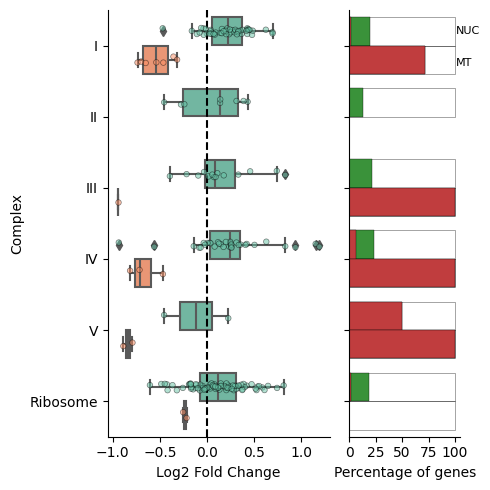

In [100]:
reload(utils)
hct_ko_results_mito = hct_ko_results[hct_ko_results['Complex'].notna()]

hct_ko_results_dataset_nuc = utils.make_per_dataset_df(hct_ko_results_mito[hct_ko_results_mito['Genome'] == 'NUC'], dataset_col = 'Complex', gene_col = 'Name')
hct_ko_results_dataset_mt = utils.make_per_dataset_df(hct_ko_results_mito[hct_ko_results_mito['Genome'] == 'MT'], dataset_col = 'Complex', gene_col = 'Name')
utils.make_coord_plots(df = hct_ko_results_mito, title = '', dataset_df_nuc = hct_ko_results_dataset_nuc, dataset_df_mt=hct_ko_results_dataset_mt, y = 'Complex', ylabel = 'Complex', save_name = 'hct_ko_vs_control_hct_116', custom_order = order, strip_alpha=.5, s = 4, kind = 'box', figsize = (5, 5))

C:\Users\shtolz\AppData\Local\Temp\ipykernel_17976\501812626.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(data= all_hct[all_hct['padj']<.05][all_hct['gene'].isin(['CEBPB', 'JUN', 'JUND'])], hue = 'dataset', x = 'gene', y = 'log2FoldChange', dodge = True, ax = ax)


,Complex,cell_line,up,down,nonsign,total,mean_lfc,oxphos_coordination_value,up+down,max_pct,Genome
0,I,HCT-116,0.0,71.43,28.57,7,-0.536784,NaN,71.43,100,MT
1,IV,HCT-116,0.0,100.00,0.00,3,-0.715217,NaN,100.00,100,MT
2,III,HCT-116,0.0,100.00,0.00,1,-0.945015,NaN,100.00,100,MT
3,V,HCT-116,0.0,100.00,0.00,2,-0.838465,NaN,100.00,100,MT
4,Ribosome,HCT-116,0.0,0.00,100.00,2,-0.233884,NaN,0.00,100,MT


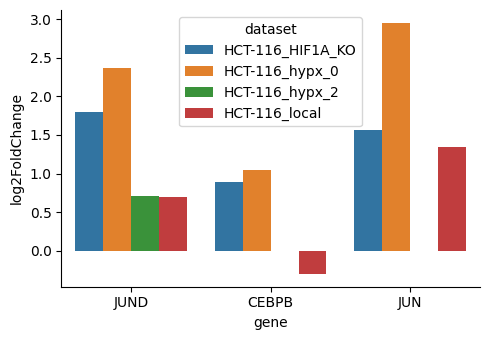

In [102]:
_, ax = plt.subplots(figsize = (5, 3.5))
sns.barplot(data= all_hct[all_hct['padj']<.05][all_hct['gene'].isin(['CEBPB', 'JUN', 'JUND'])], hue = 'dataset', x = 'gene', y = 'log2FoldChange', dodge = True, ax = ax)
# Despine
sns.despine()
# Tight
plt.tight_layout()
hct_ko_results_dataset_mt

In [104]:
hct_ko_results[hct_ko_results['Name'].isin(responder_reg_genes)].dropna(axis = 1).sort_values('padj', ascending = True)

,Name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,sign,cell_line
5415,JUND,7797.650293,0.999801,0.213774,4.676908,0.000003,0.000061,True,HCT-116
5071,TIMM8A,270.437328,0.730720,0.220896,3.307985,0.000940,0.008144,True,HCT-116
10941,RNASEH1,1081.351447,0.712145,0.218154,3.264410,0.001097,0.009231,True,HCT-116
10994,CEBPB,1798.925729,0.654748,0.211709,3.092685,0.001984,0.014671,True,HCT-116
8471,MTERF3,489.159717,-0.495190,0.167071,-2.963955,0.003037,0.020136,True,HCT-116
11278,TRMT10C,812.233954,-0.461039,0.186390,-2.473516,0.013379,0.061437,False,HCT-116
7519,NHP2,2046.728780,0.344155,0.162689,2.115424,0.034394,0.121135,False,HCT-116
4006,PARK7,6540.552664,0.302404,0.151959,1.990035,0.046587,0.151829,False,HCT-116
1075,HSD17B10,1434.147077,0.295130,0.156322,1.887955,0.059032,0.178422,False,HCT-116
140,ELAC2,3620.314427,0.333232,0.177413,1.878283,0.060342,0.181159,False,HCT-116


In [66]:
rnr1_df = results_df[(results_df['padj'] < .05)].dropna(subset = ['RNR1'])
# Chec kthe correlation between the log2FoldChange and rnr1_lfc columns per gene
rnr1_corr = rnr1_df.groupby('gene').apply(lambda x: x['log2FoldChange'].corr(x['rnr1_lfc']))
rnr1_lfc_mrp_corr = rnr1_corr.dropna()
rnr1_values = rnr1_df.set_index('gene').loc[rnr1_lfc_mrp_corr.index, 'RNR1'].drop_duplicates()
rnr1_lfc_mrp_corr = pd.concat([rnr1_lfc_mrp_corr, rnr1_values], axis = 1).rename(columns = {0 : 'Correlation'})

# Do the same for rnr2
rnr2_df = results_df[(results_df['padj'] < .05)].dropna(subset = ['RNR2'])
rnr2_corr = rnr2_df.groupby('gene').apply(lambda x: x['log2FoldChange'].corr(x['rnr2_lfc']))
rnr2_lfc_mrp_corr = rnr2_corr.dropna()
rnr2_values = rnr2_df.set_index('gene').loc[rnr2_lfc_mrp_corr.index, 'RNR2'].drop_duplicates()
rnr2_lfc_mrp_corr = pd.concat([rnr2_lfc_mrp_corr, rnr2_values], axis = 1).rename(columns = {0 : 'Correlation'})



C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\shtolz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divi

<Axes: xlabel='Correlation', ylabel='RNR2'>

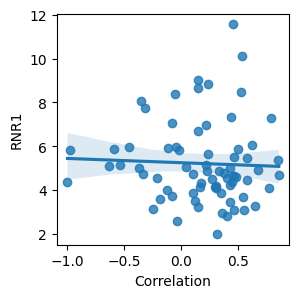

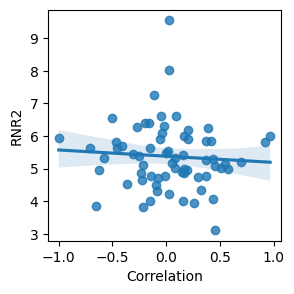

In [67]:
from scipy.stats import pearsonr
_, ax = plt.subplots(figsize = (3,3))
_, ax2 = plt.subplots(figsize = (3,3))
sns.regplot(data = rnr1_lfc_mrp_corr, x = 'Correlation', y = 'RNR1', ax = ax)
# Check correlation between rnr1_lfc_mrp_corr and rnr1_values

sns.regplot(data = rnr2_lfc_mrp_corr, x = 'Correlation', y = 'RNR2', ax = ax2)


<Axes: xlabel='RNR2', ylabel='log2FoldChange'>

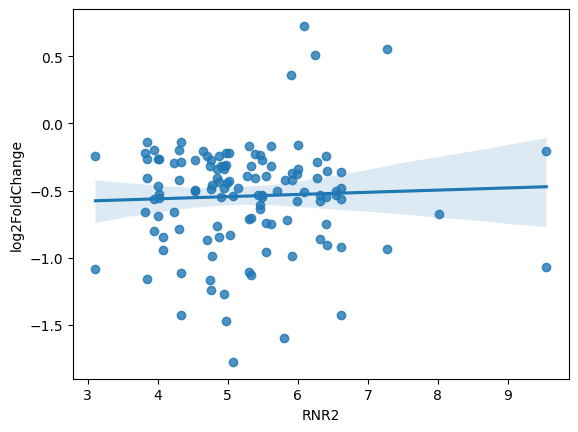

In [68]:
# Check the correlation between the ribo_RNR interaction scores and the log2FoldChange values of the genes
responders = results_df[(results_df['ribosome_coordination'] == 'Coordinated') & (results_df['padj'] < 0.05)]
# Measure the correlation between the log2 Fold-Change of ribosomal genes and mtDNA encoded rRNA genes
rnr1_corr = responders.dropna(subset = ['RNR1']).loc[:, ['RNR1', 'log2FoldChange']].corr().iloc[0,1]
sns.regplot(data = responders, x = 'RNR2', y = 'log2FoldChange')